<a href="https://colab.research.google.com/github/AntoninaRemizova/MMAD/blob/main/%D0%9C%D0%9C%D0%90%D0%94_%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
from sklearn.mixture import GaussianMixture
from itertools import combinations


# Загрузка данных

In [2]:
url = "https://raw.githubusercontent.com/AntoninaRemizova/MMAD/main/dataset1.xlsx"
data = pd.read_excel(url)
data

,№,X1,X2,X3,X4,Y
0,1,8,1,15,6,282
1,2,7,18,0,19,181
2,3,3,5,15,2,60
3,4,16,12,14,2,454
4,5,12,6,1,10,283
...,...,...,...,...,...,...
145,146,8,6,9,4,54
146,147,10,2,9,1,71
147,148,17,9,2,9,67
148,149,2,18,18,14,131


# Определение показателей и конфигурации графиков

In [3]:
columns = ['X1', 'X2', 'X3', 'X4', 'Y']
plot_config = {
    'X1': {'title': 'Число работников', 'ylabel': 'Шт.'},
    'X2': {'title': 'Фонд заработной платы', 'ylabel': 'Тыс. у.е.'},
    'X3': {'title': 'Число контрагентов', 'ylabel': 'Шт.'},
    'X4': {'title': 'Число заключенных контрактов', 'ylabel': 'Шт.'},
    'Y': {'title': 'Прибыль организации', 'ylabel': 'Млн. у.е.'}
}

# Проверка пустых значений

In [4]:
print("Количество пропущенных значений:")
print(data[columns].isnull().sum().to_string())

Количество пропущенных значений:
X1    0
X2    0
X3    0
X4    0
Y     0


# Предварительный расчет статистик для каждого показателя

In [5]:
stats_data = {}
for col in columns:
    col_data = data[col].dropna()
    stats_data[col] = {
        'values': col_data.values, # исходные значения (без пропусков)
        'mean': np.mean(col_data), # среднее арифметическое
        'median': np.median(col_data), # медиана
        'std': np.std(col_data), # стандартное отклонение
        'var': np.var(col_data), # дисперсия
        'min': np.min(col_data), # минимальное значение
        'max': np.max(col_data), # максимальное значение
        'ptp': np.ptp(col_data), # размах вариации (x_max - x_min)
        'q1': np.quantile(col_data, 0.25), # первый квартиль
        'q3': np.quantile(col_data, 0.75), # третий квартиль
        'iqr': np.quantile(col_data, 0.75) - np.quantile(col_data, 0.25), # межквартильный размах
        'gmean': stats.gmean(col_data), # среднее геометрическое
        'rms': np.sqrt(np.mean(col_data**2)), # среднее квадратическое
        'size': len(col_data) # количество наблюдений (без пропусков)
    }

# Описательная статистика

## Числовые значения

In [6]:
results = pd.DataFrame({
    col: [
        stats_data[col]['mean'],
        stats_data[col]['median'],
        stats_data[col]['var'],
        stats_data[col]['std'],
        stats_data[col]['ptp'],
        stats_data[col]['min'],
        stats_data[col]['max']
    ] for col in columns
}, index=['Среднее арифметическое',
          'Медиана', 'Дисперсия', 'Стандартное отклонение',
          'Размах вариации', 'Минимум', 'Максимум']).round(3)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

print("Описательная статистика".center(80))
print(results.to_string())

                            Описательная статистика                             
                          X1      X2      X3      X4        Y    
Среднее арифметическое  10.233  10.620   9.987  10.013    211.733
Медиана                 10.000  11.000  10.000  10.000    135.500
Дисперсия               30.072  34.116  36.106  31.226  26298.769
Стандартное отклонение   5.484   5.841   6.009   5.588    162.169
Размах вариации         20.000  20.000  20.000  20.000    619.000
Минимум                  0.000   0.000   0.000   0.000     39.000
Максимум                20.000  20.000  20.000  20.000    658.000


## Boxplots

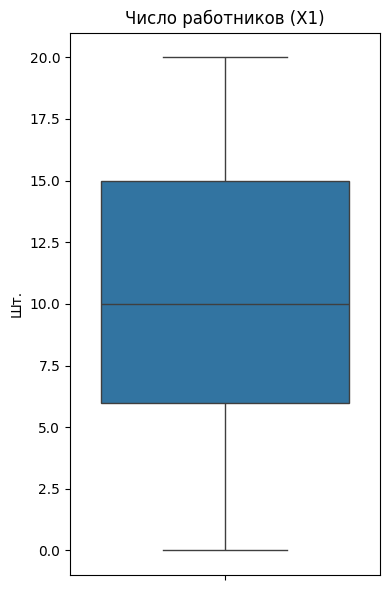

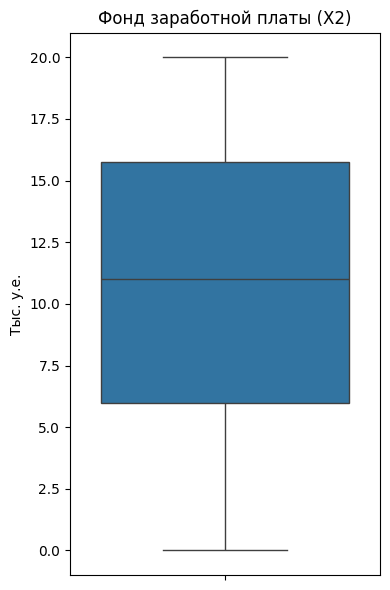

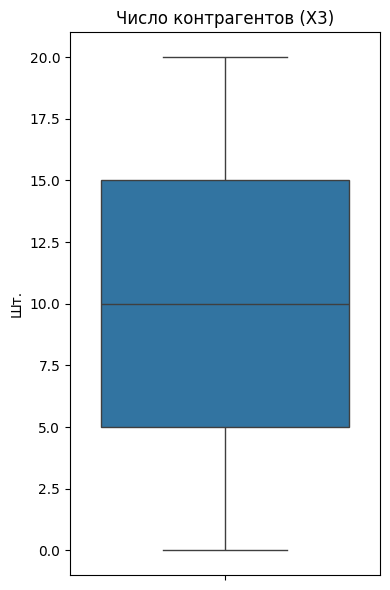

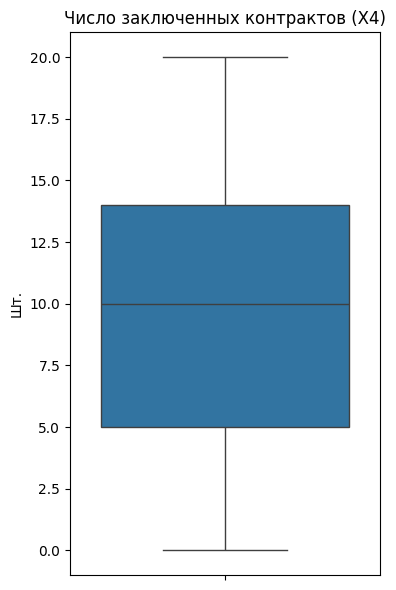

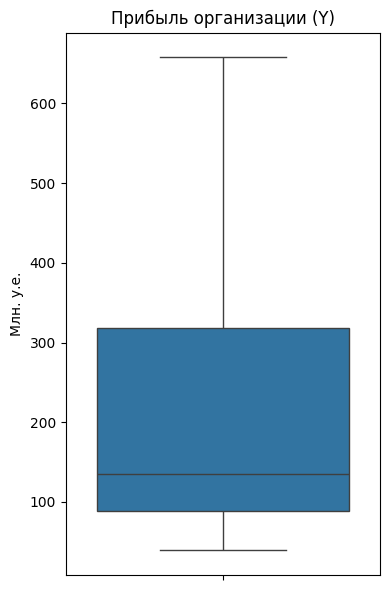

In [7]:
for col in columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(data=data[col])
    plt.title(f"{plot_config[col]['title']} ({col})")
    plt.xticks(rotation=45)
    plt.ylabel(plot_config[col]["ylabel"])
    plt.tight_layout()
    plt.show()
    print("")

# Проверка данных на случайность

## Метод медианы


Число работников (X1):
Медиана: 10.0
Выше медианы: 69 наблюдений
Ниже медианы: 71 наблюдений
Равно медиане: 10 наблюдений
Число серий (a_оп): 66
Самая длинная серия (b_оп): 8
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


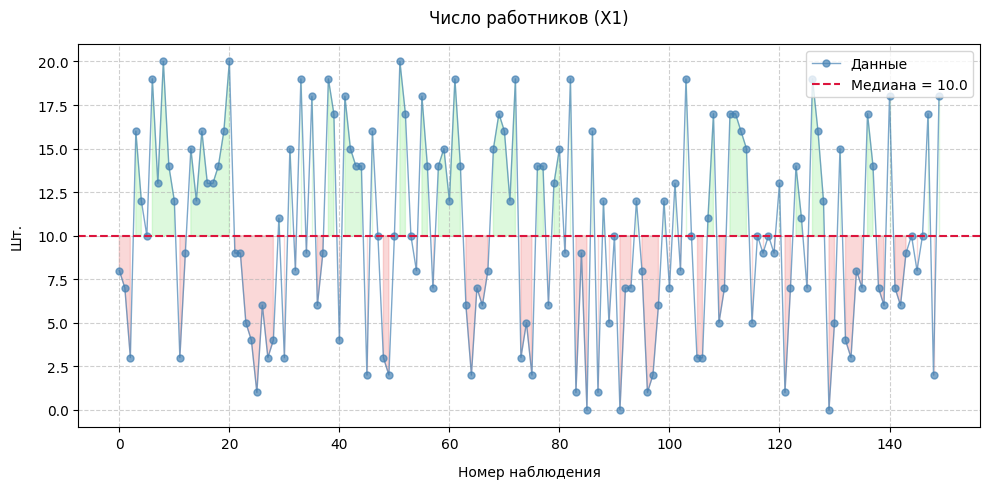


Фонд заработной платы (X2):
Медиана: 11.0
Выше медианы: 70 наблюдений
Ниже медианы: 71 наблюдений
Равно медиане: 9 наблюдений
Число серий (a_оп): 79
Самая длинная серия (b_оп): 8
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


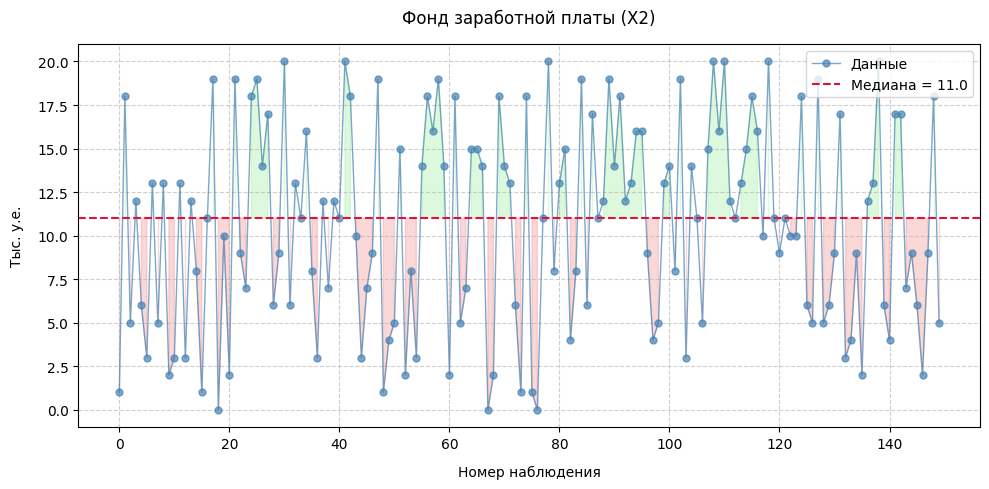


Число контрагентов (X3):
Медиана: 10.0
Выше медианы: 73 наблюдений
Ниже медианы: 70 наблюдений
Равно медиане: 7 наблюдений
Число серий (a_оп): 75
Самая длинная серия (b_оп): 7
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


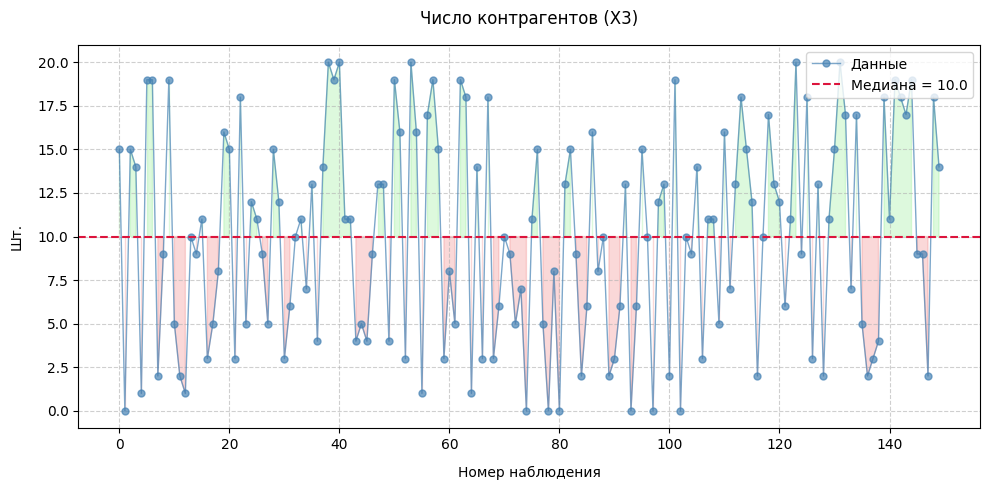


Число заключенных контрактов (X4):
Медиана: 10.0
Выше медианы: 71 наблюдений
Ниже медианы: 68 наблюдений
Равно медиане: 11 наблюдений
Число серий (a_оп): 77
Самая длинная серия (b_оп): 8
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


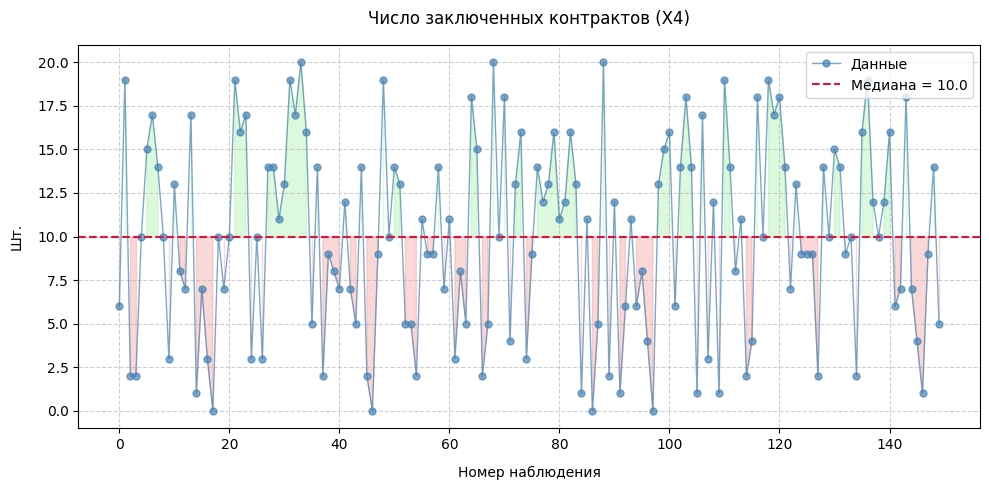


Прибыль организации (Y):
Медиана: 135.5
Выше медианы: 75 наблюдений
Ниже медианы: 75 наблюдений
Равно медиане: 0 наблюдений
Число серий (a_оп): 56
Самая длинная серия (b_оп): 10
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


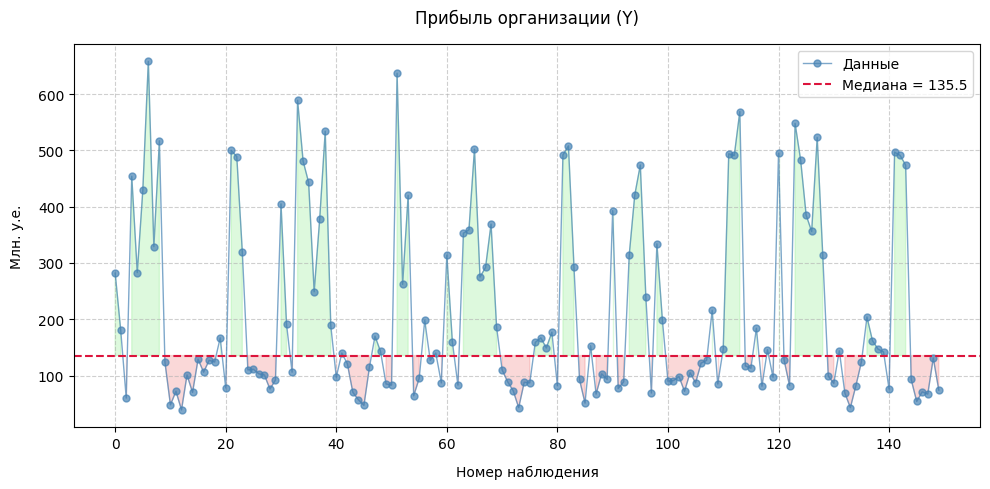

In [8]:
def check_randomness(series_values, median):
    signs = ['+' if x > median else '-' for x in series_values]

    # количество серий
    a_obs = 1
    for i in range(1, len(signs)):
        if signs[i] != signs[i-1]:
            a_obs += 1

    # длина самой длинной серии
    b_obs = 1
    current_length = 1
    for i in range(1, len(signs)):
        if signs[i] == signs[i-1]:
            current_length += 1
            if current_length > b_obs:
                b_obs = current_length
        else:
            current_length = 1

    # критические значения
    n = len(series_values)
    a_crit = math.floor(0.5 * (n + 1) - 1.96 * math.sqrt(n - 1))
    b_crit = math.floor(3.3 * math.log(n) + 1)

    # проверяем критерии
    is_random = (a_obs > a_crit) and (b_obs < b_crit)

    return {
        'a_obs': a_obs,
        'b_obs': b_obs,
        'a_crit': a_crit,
        'b_crit': b_crit,
        'is_random': is_random,
        'above': len(series_values[series_values > median]),
        'below': len(series_values[series_values < median]),
        'equal': len(series_values[series_values == median])
    }

for col in columns:
    res = check_randomness(stats_data[col]['values'], stats_data[col]['median'])

    print(f"\n{plot_config[col]['title']} ({col}):")
    print(f"Медиана: {stats_data[col]['median']:.1f}")
    print(f"Выше медианы: {res['above']} наблюдений")
    print(f"Ниже медианы: {res['below']} наблюдений")
    print(f"Равно медиане: {res['equal']} наблюдений")
    print(f"Число серий (a_оп): {res['a_obs']}")
    print(f"Самая длинная серия (b_оп): {res['b_obs']}")
    print(f"Критическое число серий (a_кр): {res['a_crit']}")
    print(f"Критическая длина серий (b_кр): {res['b_crit']}")
    print(f"Вывод: {'Данные случайны' if res['is_random'] else 'Данные НЕ случайны'}")
    print(" ")

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(stats_data[col]['values'], 'o-', color='steelblue', alpha=0.7, markersize=5, linewidth=1, label='Данные')

    ax.axhline(stats_data[col]['median'], color='crimson', linestyle='--', linewidth=1.5, label=f'Медиана = {stats_data[col]["median"]:.1f}')

    ax.fill_between(range(len(stats_data[col]['values'])), stats_data[col]['median'], stats_data[col]['values'],
                    where=(stats_data[col]['values'] > stats_data[col]['median']), color='lightgreen', alpha=0.3)
    ax.fill_between(range(len(stats_data[col]['values'])), stats_data[col]['median'], stats_data[col]['values'],
                    where=(stats_data[col]['values'] < stats_data[col]['median']), color='lightcoral', alpha=0.3)

    ax.set_title(f"{plot_config[col]['title']} ({col})", pad=15)
    ax.set_xlabel('Номер наблюдения', labelpad=10)
    ax.set_ylabel(plot_config[col]["ylabel"], labelpad=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Проверка данных на выбросы

## Метод квантилей

In [9]:
def detect_outliers_iqr(values, q1, q3, iqr):
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (values < lower_bound) | (values > upper_bound)

for col in columns:
    outliers_mask = detect_outliers_iqr(stats_data[col]['values'], stats_data[col]['q1'], stats_data[col]['q3'], stats_data[col]['iqr'])
    outliers = stats_data[col]['values'][outliers_mask]

    print(f"\n{plot_config[col]['title']} ({col}):")
    print(f"Q1: {stats_data[col]['q1']:.2f}")
    print(f"Q3: {stats_data[col]['q3']:.2f}")
    print(f"IQR: {stats_data[col]['iqr']:.2f}")
    print(f"Нижняя граница выбросов: {stats_data[col]['q1'] - 1.5*stats_data[col]['iqr']:.2f}")
    print(f"Верхняя граница выбросов: {stats_data[col]['q3'] + 1.5*stats_data[col]['iqr']:.2f}")

    if len(outliers) > 0:
        print(f"Количество выбросов: {len(outliers)} ({len(outliers)/stats_data[col]['size']*100:.2f}%)")
        print("Значения выбросов:", outliers)
    else:
        print("Выбросы не обнаружены.")



Число работников (X1):
Q1: 6.00
Q3: 15.00
IQR: 9.00
Нижняя граница выбросов: -7.50
Верхняя граница выбросов: 28.50
Выбросы не обнаружены.

Фонд заработной платы (X2):
Q1: 6.00
Q3: 15.75
IQR: 9.75
Нижняя граница выбросов: -8.62
Верхняя граница выбросов: 30.38
Выбросы не обнаружены.

Число контрагентов (X3):
Q1: 5.00
Q3: 15.00
IQR: 10.00
Нижняя граница выбросов: -10.00
Верхняя граница выбросов: 30.00
Выбросы не обнаружены.

Число заключенных контрактов (X4):
Q1: 5.00
Q3: 14.00
IQR: 9.00
Нижняя граница выбросов: -8.50
Верхняя граница выбросов: 27.50
Выбросы не обнаружены.

Прибыль организации (Y):
Q1: 88.25
Q3: 318.75
IQR: 230.50
Нижняя граница выбросов: -257.50
Верхняя граница выбросов: 664.50
Выбросы не обнаружены.


## Правило трех сигм


Число работников (X1):
Среднее значение (μ): 10.23
Стандартное отклонение (σ): 5.48
Нижняя граница (μ-3σ): -6.22
Верхняя граница (μ+3σ): 26.68
Количество выбросов: 0
Выбросы не обнаружены

Фонд заработной платы (X2):
Среднее значение (μ): 10.62
Стандартное отклонение (σ): 5.84
Нижняя граница (μ-3σ): -6.90
Верхняя граница (μ+3σ): 28.14
Количество выбросов: 0
Выбросы не обнаружены

Число контрагентов (X3):
Среднее значение (μ): 9.99
Стандартное отклонение (σ): 6.01
Нижняя граница (μ-3σ): -8.04
Верхняя граница (μ+3σ): 28.01
Количество выбросов: 0
Выбросы не обнаружены

Число заключенных контрактов (X4):
Среднее значение (μ): 10.01
Стандартное отклонение (σ): 5.59
Нижняя граница (μ-3σ): -6.75
Верхняя граница (μ+3σ): 26.78
Количество выбросов: 0
Выбросы не обнаружены

Прибыль организации (Y):
Среднее значение (μ): 211.73
Стандартное отклонение (σ): 162.17
Нижняя граница (μ-3σ): -274.77
Верхняя граница (μ+3σ): 698.24
Количество выбросов: 0
Выбросы не обнаружены


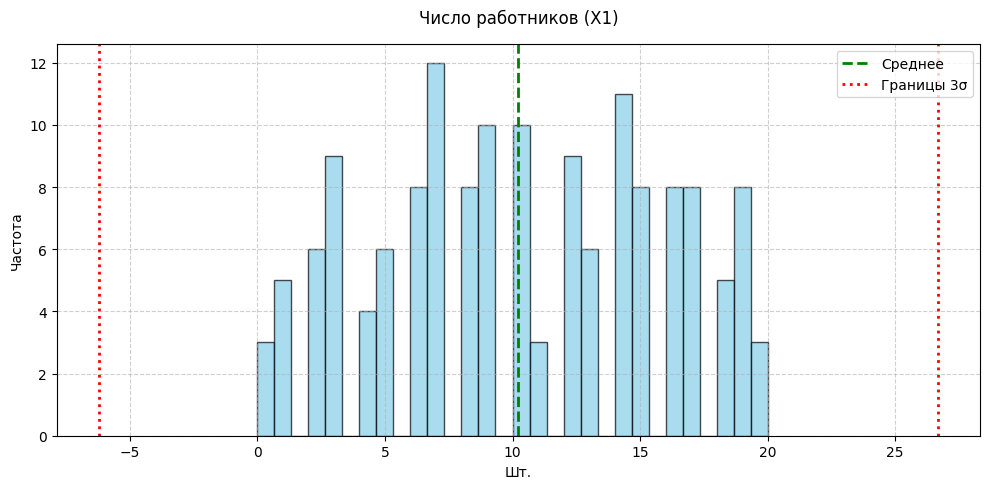

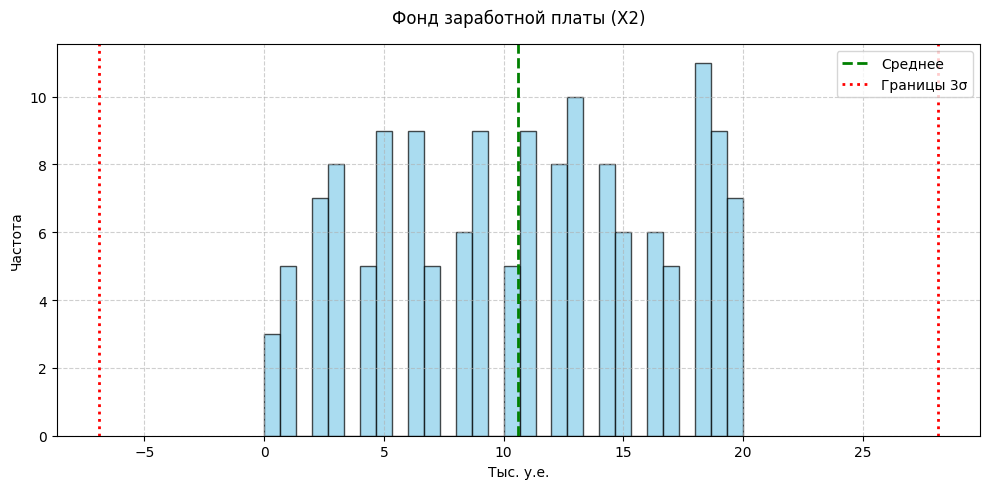

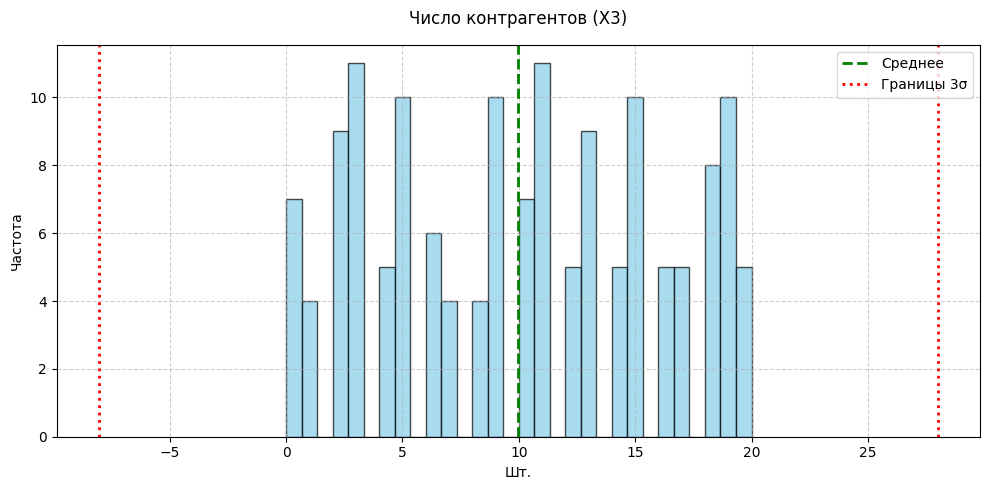

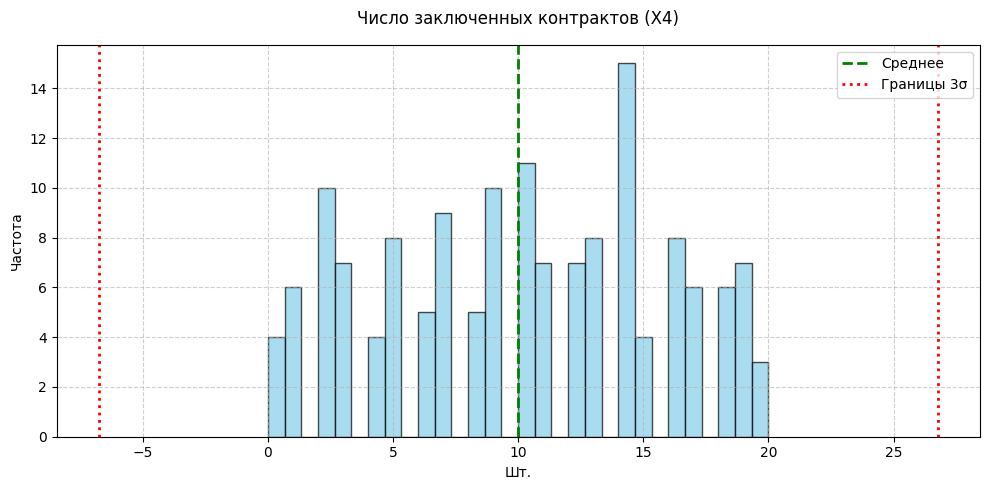

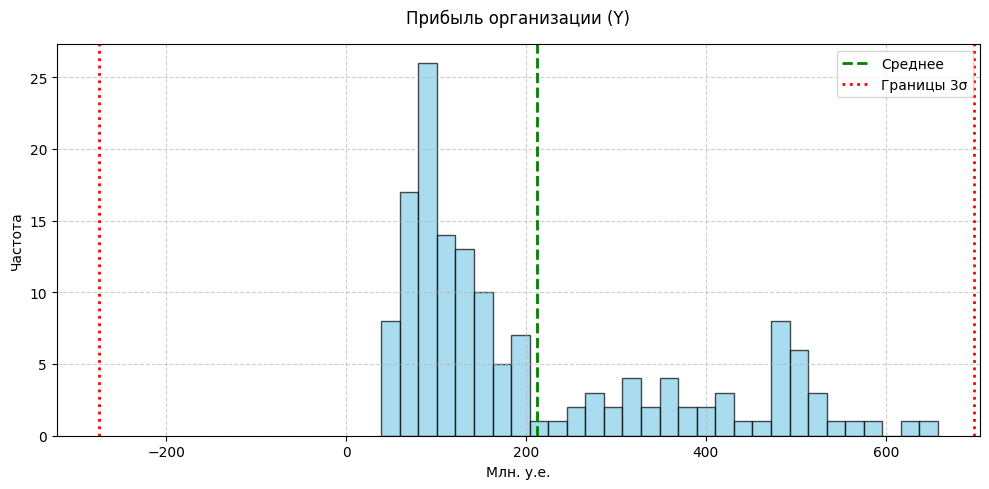

In [10]:
def detect_outliers_3sigma(values, mean, std):
    lower_bound = mean - 3*std
    upper_bound = mean + 3*std
    return (values < lower_bound) | (values > upper_bound)

for col in columns:
    outliers_mask = detect_outliers_3sigma(stats_data[col]['values'], stats_data[col]['mean'], stats_data[col]['std'])
    outliers = stats_data[col]['values'][outliers_mask]

    print(f"\n{plot_config[col]['title']} ({col}):")
    print(f"Среднее значение (μ): {stats_data[col]['mean']:.2f}")
    print(f"Стандартное отклонение (σ): {stats_data[col]['std']:.2f}")
    print(f"Нижняя граница (μ-3σ): {stats_data[col]['mean'] - 3*stats_data[col]['std']:.2f}")
    print(f"Верхняя граница (μ+3σ): {stats_data[col]['mean'] + 3*stats_data[col]['std']:.2f}")
    print(f"Количество выбросов: {len(outliers)}")

    if len(outliers) > 0:
        print("Значения выбросов:", outliers)
    else:
        print("Выбросы не обнаружены")

for col in columns:
    plt.figure(figsize=(10, 5))
    plt.hist(stats_data[col]['values'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')

    mean = stats_data[col]['mean']
    std = stats_data[col]['std']
    plt.axvline(mean, color='green', linestyle='--', linewidth=2, label='Среднее')
    plt.axvline(mean - 3*std, color='red', linestyle=':', linewidth=2, label='Границы 3σ')
    plt.axvline(mean + 3*std, color='red', linestyle=':', linewidth=2)

    outliers_mask = detect_outliers_3sigma(stats_data[col]['values'], mean, std)
    outliers = stats_data[col]['values'][outliers_mask]
    for value in outliers:
        plt.axvline(value, color='orange', linestyle='-', linewidth=1.5, alpha=0.5)

    plt.title(f"{plot_config[col]['title']} ({col})", pad=15)
    plt.xlabel(plot_config[col]["ylabel"])
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    print("")

# Проверка на однородность


=== Сравнение X1 и X2 ===
Число работников vs Фонд заработной платы


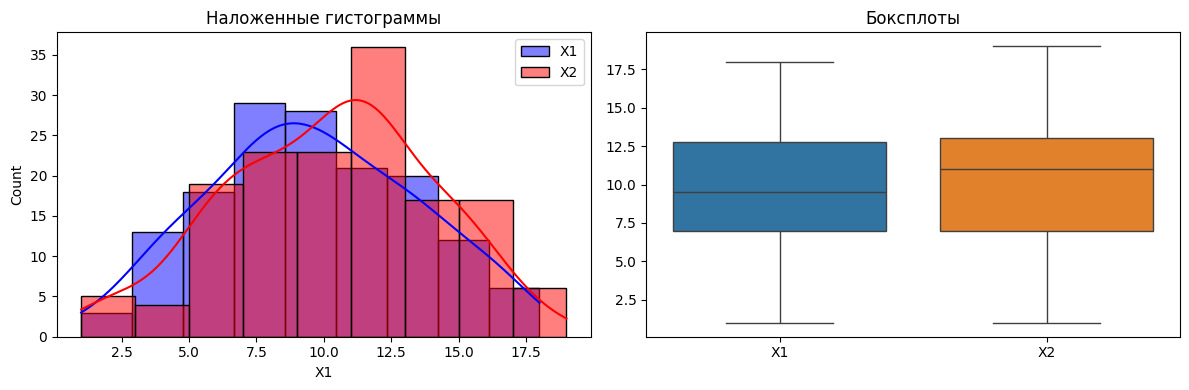

Критерий знаков: p-value = 1.0000
Критерий Вилкоксона: p-value = 0.1599
Заключение: выборки однородны

=== Сравнение X1 и X3 ===
Число работников vs Число контрагентов


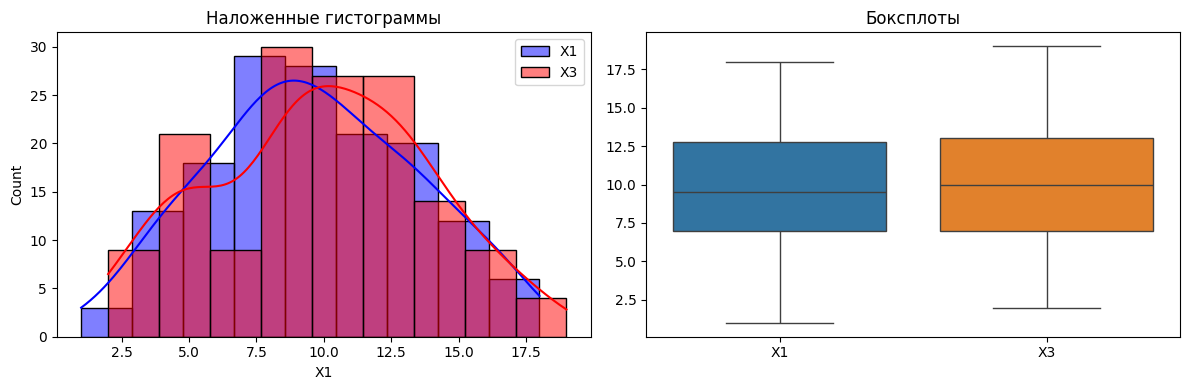

Критерий знаков: p-value = 0.4470
Критерий Вилкоксона: p-value = 0.4558
Заключение: выборки однородны

=== Сравнение X1 и X4 ===
Число работников vs Число заключенных контрактов


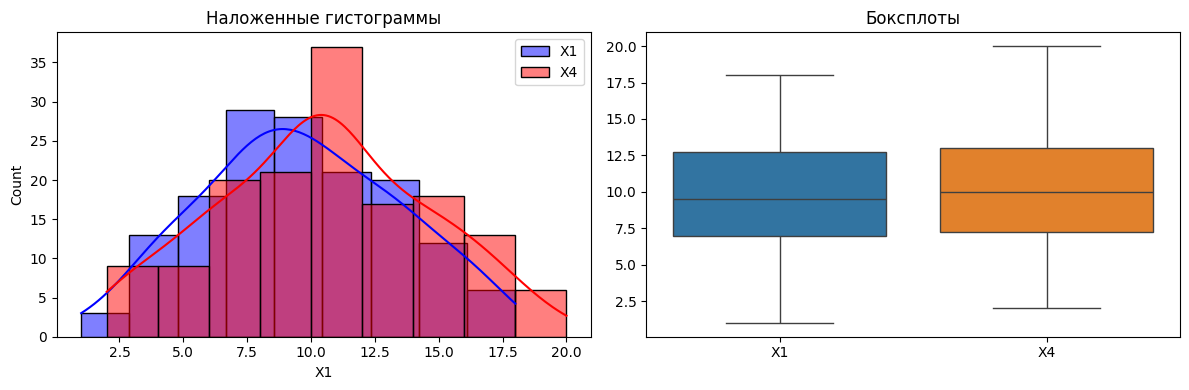

Критерий знаков: p-value = 0.1776
Критерий Вилкоксона: p-value = 0.1109
Заключение: выборки однородны

=== Сравнение X1 и Y ===
Число работников vs Прибыль организации


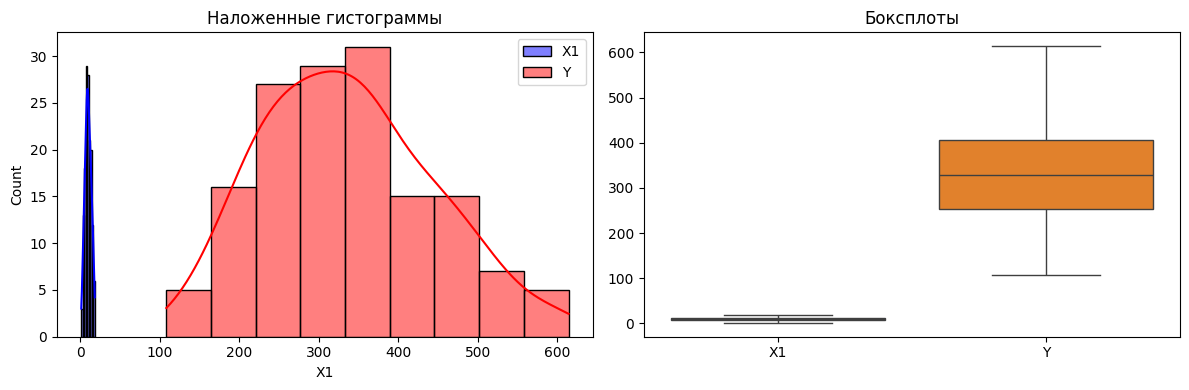

Критерий знаков: p-value = 0.0000
Критерий Вилкоксона: p-value = 0.0000
Заключение: выборки неоднородны

=== Сравнение X2 и X3 ===
Фонд заработной платы vs Число контрагентов


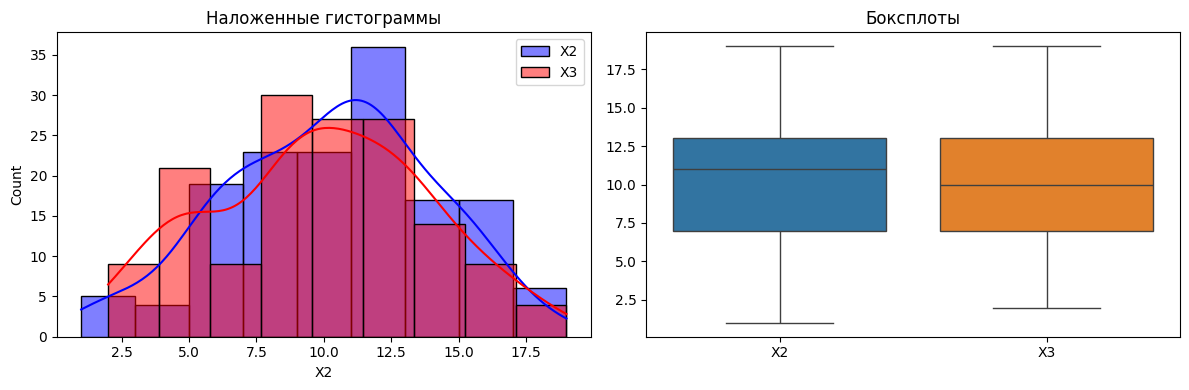

Критерий знаков: p-value = 0.8634
Критерий Вилкоксона: p-value = 0.4733
Заключение: выборки однородны

=== Сравнение X2 и X4 ===
Фонд заработной платы vs Число заключенных контрактов


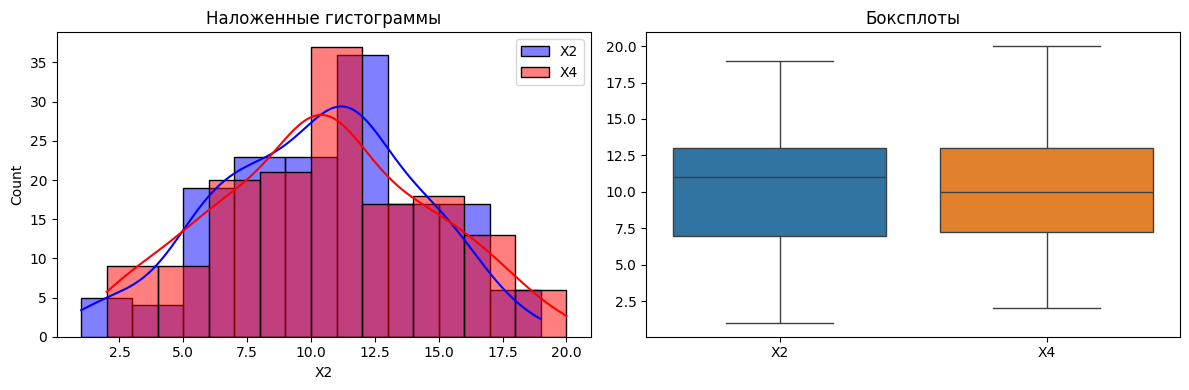

Критерий знаков: p-value = 0.5006
Критерий Вилкоксона: p-value = 0.6443
Заключение: выборки однородны

=== Сравнение X2 и Y ===
Фонд заработной платы vs Прибыль организации


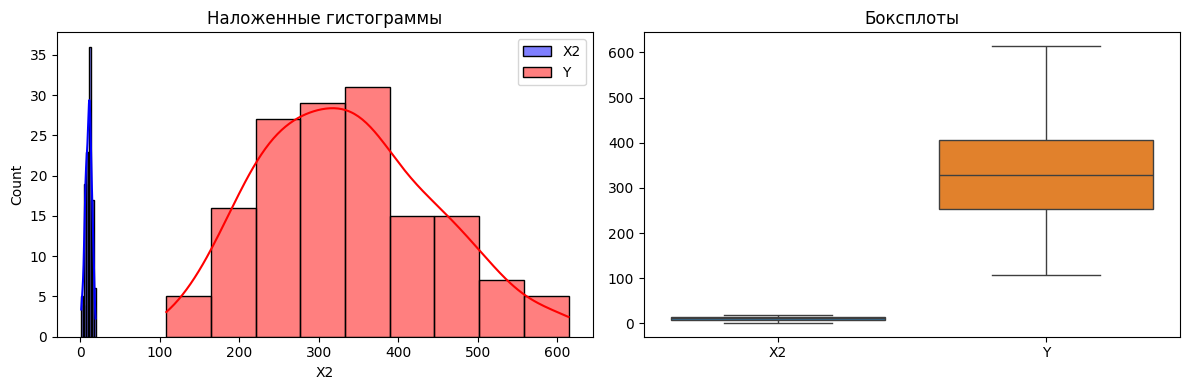

Критерий знаков: p-value = 0.0000
Критерий Вилкоксона: p-value = 0.0000
Заключение: выборки неоднородны

=== Сравнение X3 и X4 ===
Число контрагентов vs Число заключенных контрактов


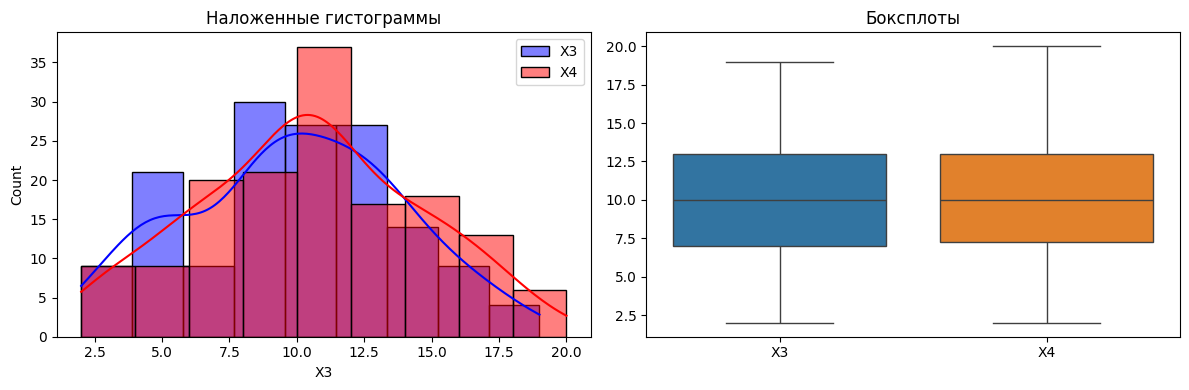

Критерий знаков: p-value = 0.1320
Критерий Вилкоксона: p-value = 0.2815
Заключение: выборки однородны

=== Сравнение X3 и Y ===
Число контрагентов vs Прибыль организации


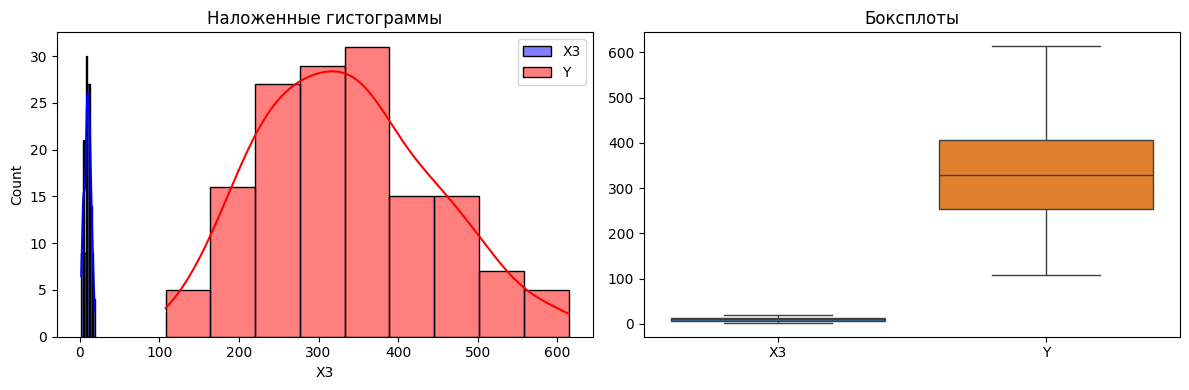

Критерий знаков: p-value = 0.0000
Критерий Вилкоксона: p-value = 0.0000
Заключение: выборки неоднородны

=== Сравнение X4 и Y ===
Число заключенных контрактов vs Прибыль организации


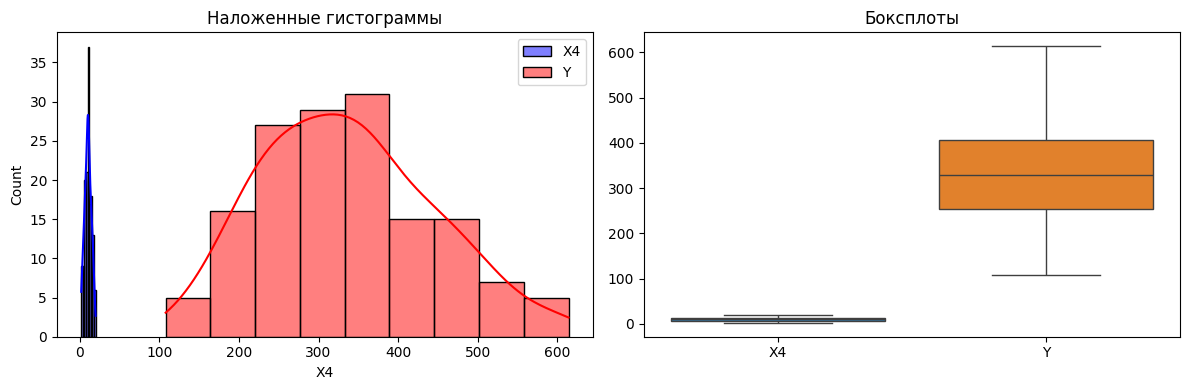

Критерий знаков: p-value = 0.0000
Критерий Вилкоксона: p-value = 0.0000
Заключение: выборки неоднородны

Матрица однородности выборок
True - однородны, False - неоднородны
     X1     X2     X3     X4     Y   
X1   True   True   True   True  False
X2   True   True   True   True  False
X3   True   True   True   True  False
X4   True   True   True   True  False
Y   False  False  False  False   True


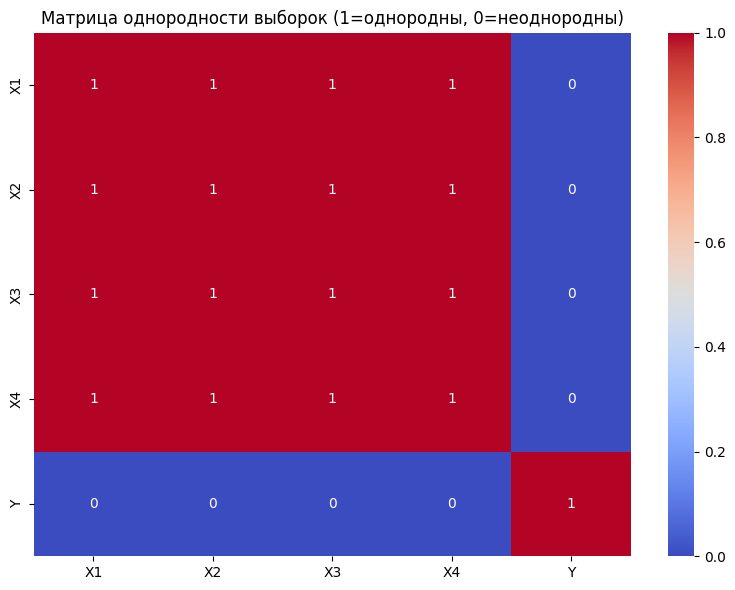

In [22]:
def compare_samples(sample1, sample2, name1, name2, config):
    """Сравнивает две выборки с помощью критериев знаков и Вилкоксона"""
    print(f"\n=== Сравнение {name1} и {name2} ===")
    print(f"{config[name1]['title']} vs {config[name2]['title']}")

    # Визуализация
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(sample1, color='blue', kde=True, alpha=0.5, label=name1)
    sns.histplot(sample2, color='red', kde=True, alpha=0.5, label=name2)
    plt.title("Наложенные гистограммы")
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.boxplot(data=[sample1, sample2])
    plt.xticks([0, 1], [name1, name2])
    plt.title("Боксплоты")

    plt.tight_layout()
    plt.show()

    # Критерий знаков (Sign Test)
    min_len = min(len(sample1), len(sample2))
    diff = sample1[:min_len] - sample2[:min_len]
    n_pos = sum(diff > 0)
    n_neg = sum(diff < 0)
    sign_p = stats.binomtest(min(n_pos, n_neg), n_pos + n_neg, 0.5).pvalue
    print(f"Критерий знаков: p-value = {sign_p:.4f}")

    # Критерий Вилкоксона (Wilcoxon Signed-Rank Test)
    try:
        wilcoxon_stat, wilcoxon_p = stats.wilcoxon(sample1[:min_len], sample2[:min_len])
        print(f"Критерий Вилкоксона: p-value = {wilcoxon_p:.4f}")
    except Exception as e:
        wilcoxon_p = 1.0
        print(f"Критерий Вилкоксона не может быть применен: {str(e)}")

    # Вывод о однородности
    is_homogeneous = sign_p > 0.05 and wilcoxon_p > 0.05
    print(f"Заключение: выборки {'однородны' if is_homogeneous else 'неоднородны'}")

    return is_homogeneous

# Создаем таблицу для результатов
results = pd.DataFrame(index=columns, columns=columns)

# Проверяем все возможные пары
for col1, col2 in combinations(columns, 2):
    res = compare_samples(data[col1], data[col2], col1, col2, plot_config)
    results.loc[col1, col2] = res
    results.loc[col2, col1] = res

# Заполняем диагональ (сравнение с собой)
for col in columns:
    results.loc[col, col] = True

# Выводим матрицу однородности
print("\nМатрица однородности выборок")
print("True - однородны, False - неоднородны")
print(results)

# Визуализация матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(results.astype(float), annot=True, cmap='coolwarm',
            xticklabels=columns, yticklabels=columns,
            vmin=0, vmax=1, center=0.5)
plt.title("Матрица однородности выборок (1=однородны, 0=неоднородны)")
plt.tight_layout()
plt.show()

# Проверка на нормальность распределения

## Коэффициент ассиметрии и эксцесса


Анализ распределения для 'X1':
Коэффициент асимметрии: -0.028 (симметричное)
Коэффициент эксцесса: -1.074 (плосковершинный)
Тест на нормальность (Shapiro-Wilk): p-value = 0.0005


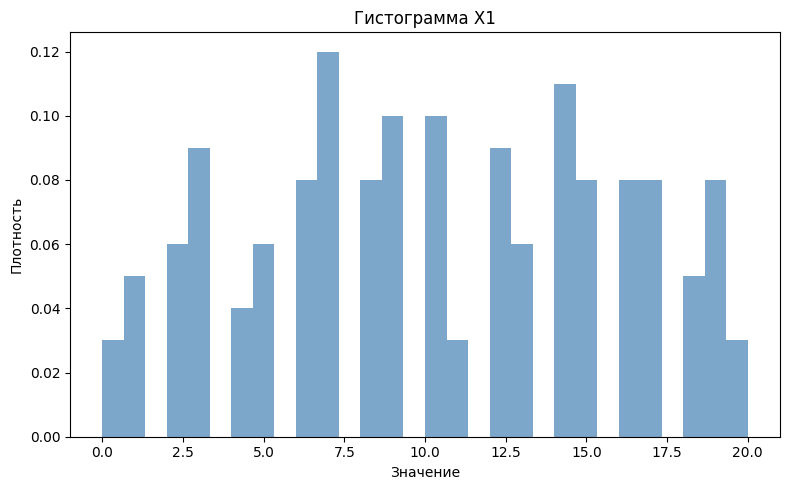


Анализ распределения для 'X2':
Коэффициент асимметрии: -0.057 (симметричное)
Коэффициент эксцесса: -1.175 (плосковершинный)
Тест на нормальность (Shapiro-Wilk): p-value = 0.0000


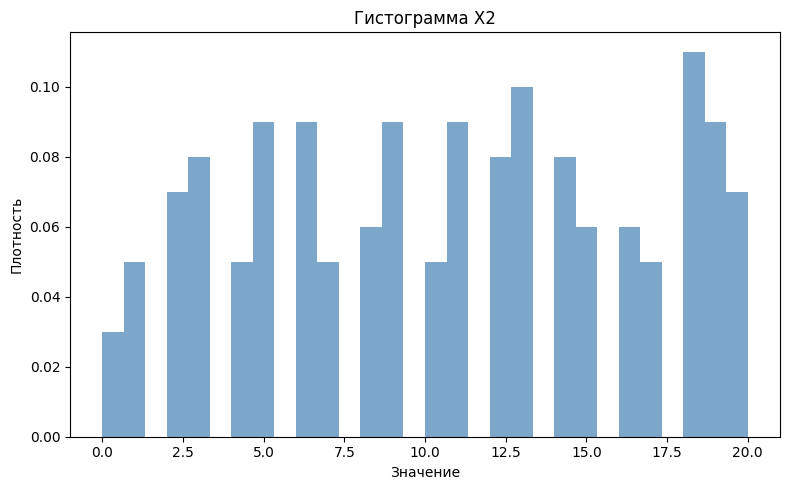


Анализ распределения для 'X3':
Коэффициент асимметрии: 0.003 (симметричное)
Коэффициент эксцесса: -1.213 (плосковершинный)
Тест на нормальность (Shapiro-Wilk): p-value = 0.0000


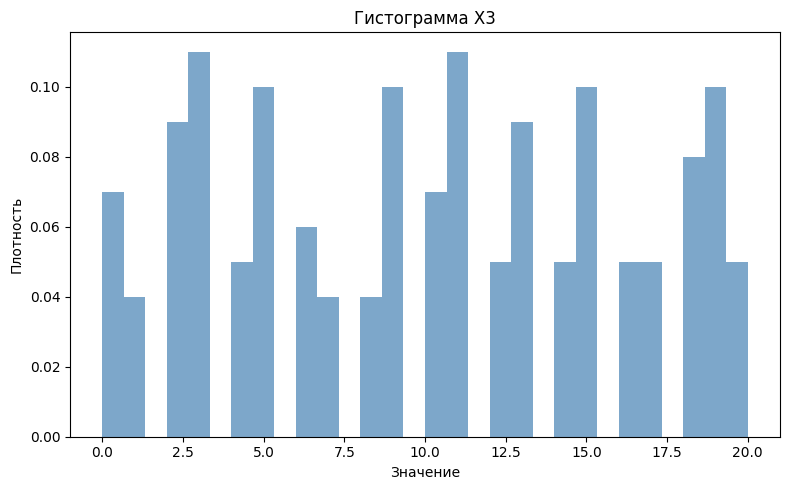


Анализ распределения для 'X4':
Коэффициент асимметрии: -0.071 (симметричное)
Коэффициент эксцесса: -1.073 (плосковершинный)
Тест на нормальность (Shapiro-Wilk): p-value = 0.0003


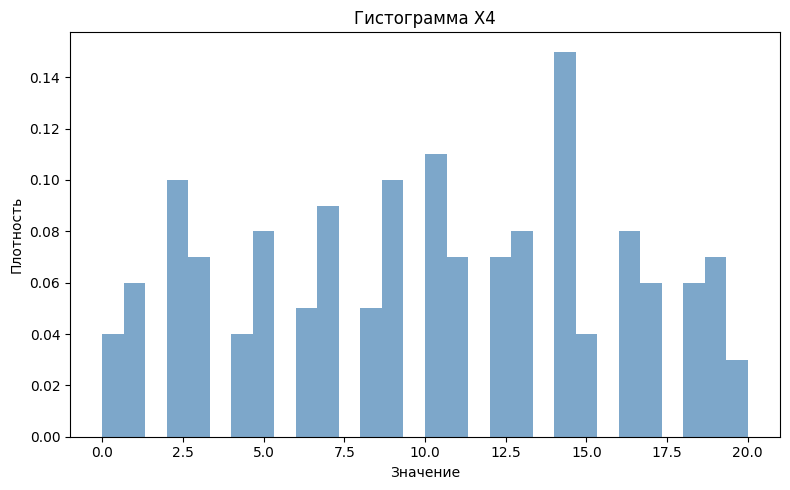


Анализ распределения для 'Y':
Коэффициент асимметрии: 1.008 (правостороннее)
Коэффициент эксцесса: -0.336 (нормальный)
Тест на нормальность (Shapiro-Wilk): p-value = 0.0000


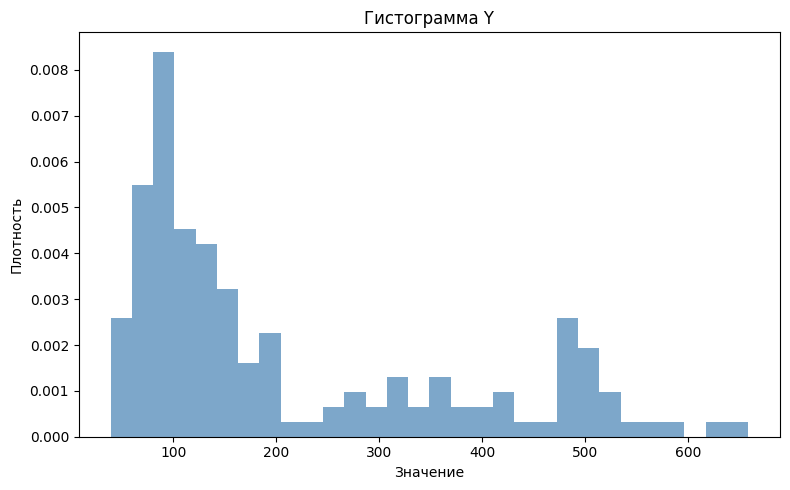

In [11]:
def analyze_distribution(data, column_name):
    values = data[column_name]

    skewness = stats.skew(values) # асимметрия
    kurtosis = stats.kurtosis(values, fisher=True)  # эксцесс


    skew_interpret = "симметричное" if -0.5 < skewness < 0.5 else \
                    "правостороннее" if skewness >= 0.5 else "левостороннее"

    kurt_interpret = "нормальный" if -0.5 < kurtosis < 0.5 else \
                     "островершинный" if kurtosis >= 0.5 else "плосковершинный"


    print(f"\nАнализ распределения для '{column_name}':")
    print(f"Коэффициент асимметрии: {skewness:.3f} ({skew_interpret})")
    print(f"Коэффициент эксцесса: {kurtosis:.3f} ({kurt_interpret})")
    print(f"Тест на нормальность (Shapiro-Wilk): p-value = {stats.shapiro(values)[1]:.4f}")


    plt.figure(figsize=(8, 5))


    plt.hist(values, bins=30, density=True, alpha=0.7, color='steelblue')
    plt.title(f'Гистограмма {column_name}')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')

    plt.tight_layout()
    plt.show()

for col in columns:
    analyze_distribution(data, col)

## Критерий Пирсона

Описательные статистики:
         X1      X2      X3      X4       Y  
count  150.00  150.00  150.00  150.00  150.00
mean     9.59   10.17    9.87   10.41  335.82
std      3.87    3.84    4.01    4.14  107.59
min      1.00    1.00    2.00    2.00  108.00
25%      7.00    7.00    7.00    7.25  253.00
50%      9.50   11.00   10.00   10.00  328.50
75%     12.75   13.00   13.00   13.00  405.75
max     18.00   19.00   19.00   20.00  614.00

Проверка нормальности (p-value > 0.05 - нормальность не отвергается):
X1: p-value = 0.0606
X2: p-value = 0.0831
X3: p-value = 0.0173
X4: p-value = 0.0625
Y: p-value = 0.1021


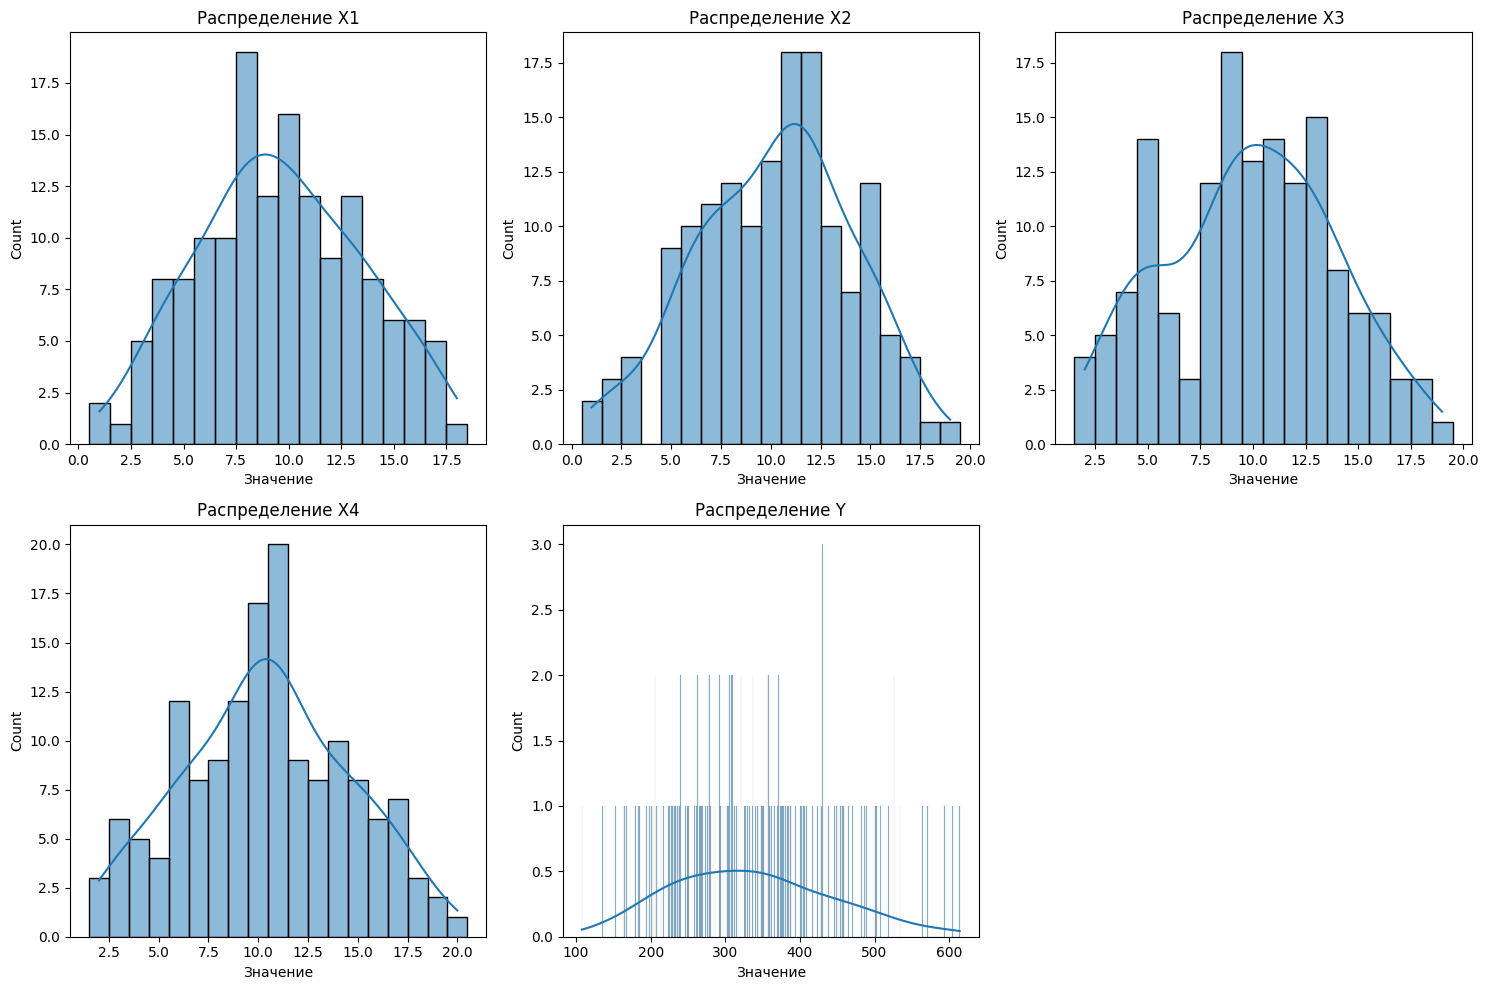


Минимальные и максимальные значения:
X1: 1 - 18
X2: 1 - 19
X3: 2 - 19
X4: 2 - 20
Y: 108 - 614


In [12]:
import numpy as np
import pandas as pd
from scipy import stats

# Параметры генерации
np.random.seed(42)  # Для воспроизводимости
n = 150             # Количество значений в каждой выборке

# Генерация X1-X4 (целые числа 0-20)
def generate_x():
    mean = 10        # Среднее в середине диапазона
    std = 4          # Стандартное отклонение (уменьшено для лучшего распределения целых чисел)
    values = stats.truncnorm.rvs(
        (0 - mean) / std, (20 - mean) / std,
        loc=mean, scale=std, size=n
    )
    return np.round(values).astype(int).clip(0, 20)

# Генерация Y (целые числа 39-658)
def generate_y():
    mean = (658 + 39) / 2  # Среднее в середине диапазона
    std = (658 - 39) / 5    # Скорректированное стандартное отклонение
    values = stats.truncnorm.rvs(
        (39 - mean) / std, (658 - mean) / std,
        loc=mean, scale=std, size=n
    )
    return np.round(values).astype(int).clip(39, 658)

# Создаем DataFrame
data = pd.DataFrame({
    'X1': generate_x(),
    'X2': generate_x(),
    'X3': generate_x(),
    'X4': generate_x(),
    'Y': generate_y()
})

# Проверка характеристик
print("Описательные статистики:")
print(data.describe().round(2))

# Проверка нормальности (тест Шапиро-Уилка)
print("\nПроверка нормальности (p-value > 0.05 - нормальность не отвергается):")
for col in data.columns:
    stat, p = stats.shapiro(data[col])
    print(f"{col}: p-value = {p:.4f}")

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, discrete=True)
    plt.title(f'Распределение {col}')
    plt.xlabel('Значение')
plt.tight_layout()
plt.show()

# Проверка границ значений
print("\nМинимальные и максимальные значения:")
print(f"X1: {data['X1'].min()} - {data['X1'].max()}")
print(f"X2: {data['X2'].min()} - {data['X2'].max()}")
print(f"X3: {data['X3'].min()} - {data['X3'].max()}")
print(f"X4: {data['X4'].min()} - {data['X4'].max()}")
print(f"Y: {data['Y'].min()} - {data['Y'].max()}")

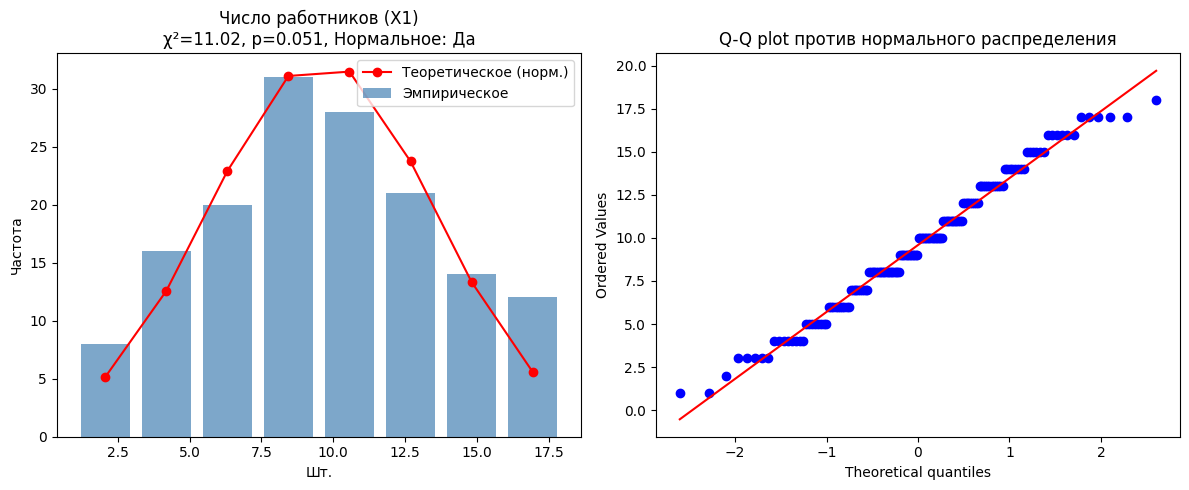

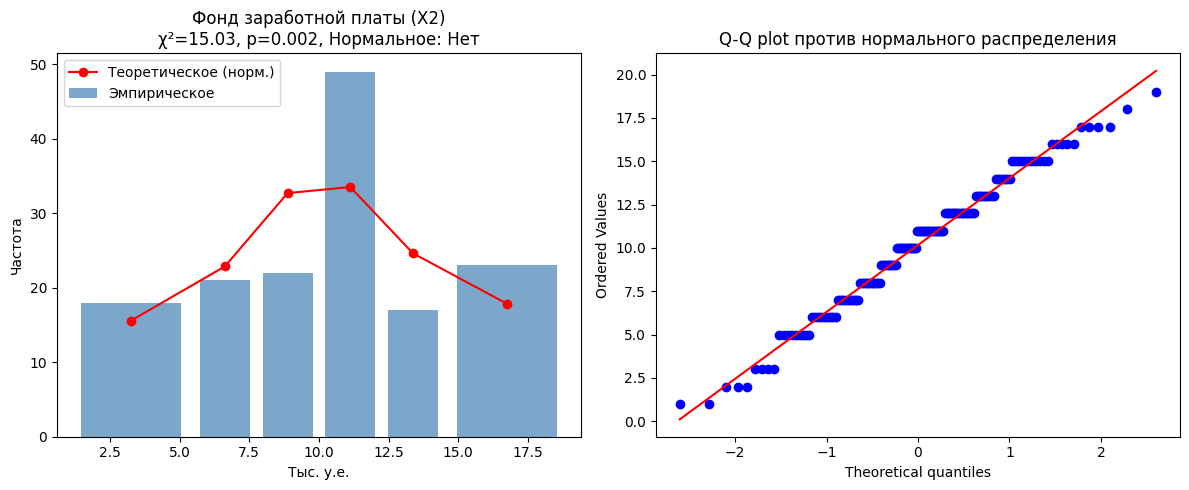

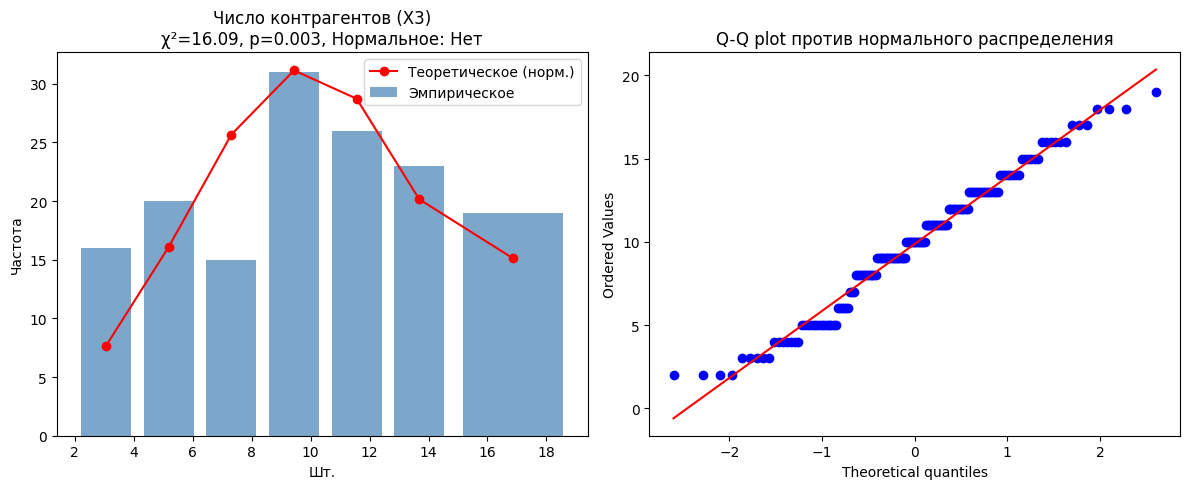

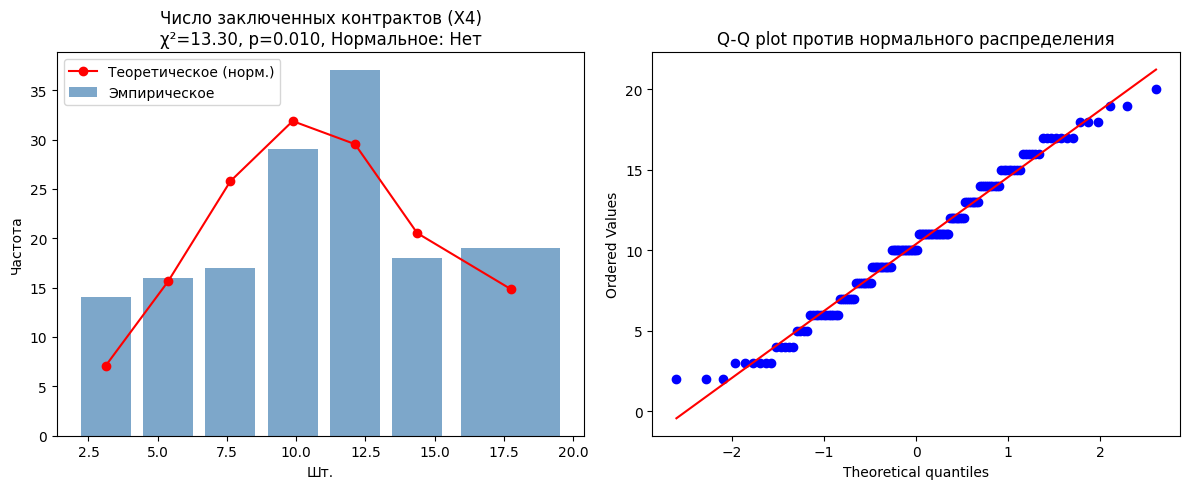

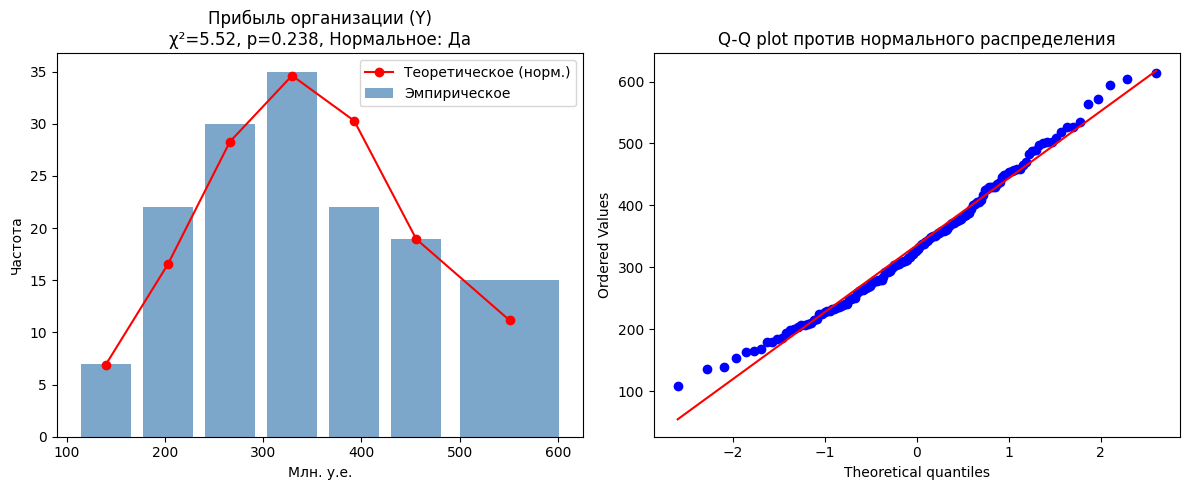


Результаты проверки нормальности распределения:
----------------------------------------------
Переменная           Название            Размер выборки  χ² статистика  Степени свободы  p-value  Нормальное
    X1                 Число работников       150         11.018671           5         0.051011     True   
    X2            Фонд заработной платы       150         15.032175           3         0.001789    False   
    X3               Число контрагентов       150         16.088920           4         0.002902    False   
    X4     Число заключенных контрактов       150         13.302219           4         0.009890    False   
     Y              Прибыль организации       150          5.515275           4         0.238390     True   

Примечание: Нормальное = True означает, что распределение не отличается от нормального


,Переменная,Название,Размер выборки,χ² статистика,Степени свободы,p-value,Нормальное
0,X1,Число работников,150,11.018671,5,0.051011,True
1,X2,Фонд заработной платы,150,15.032175,3,0.001789,False
2,X3,Число контрагентов,150,16.088920,4,0.002902,False
3,X4,Число заключенных контрактов,150,13.302219,4,0.009890,False
4,Y,Прибыль организации,150,5.515275,4,0.238390,True


In [13]:


def pearson_normality_test(data, columns, plot_config, alpha=0.05):
    """
    Проверка нормальности распределения по критерию Пирсона с визуализацией

    Параметры:
    data - DataFrame с данными
    columns - список столбцов для анализа
    plot_config - конфигурация графиков
    alpha - уровень значимости (по умолчанию 0.05)
    """
    results = []

    for col in columns:
        # Извлечение данных и удаление пропущенных значений
        sample = data[col].dropna().values
        n = len(sample)

        # Расчет параметров нормального распределения
        mu, sigma = np.mean(sample), np.std(sample, ddof=1)

        # Определение интервалов гистограммы (правило Стёрджеса)
        n_bins = max(5, min(15, int(1 + 3.322 * np.log10(n))))
        hist, bin_edges = np.histogram(sample, bins=n_bins, density=False)

        # Расчет теоретических частот
        cdf_values = stats.norm.cdf(bin_edges, mu, sigma)
        theoretical_probs = np.diff(cdf_values)
        theoretical_freq = theoretical_probs * n

        # Объединение интервалов с малыми ожидаемыми частотами (<5)
        valid = False
        while not valid:
            if np.all(theoretical_freq >= 5):
                valid = True
            else:
                # Находим интервал с наименьшей частотой
                min_idx = np.argmin(theoretical_freq)

                # Объединяем с соседним интервалом
                if min_idx == 0:
                    # Объединение с правым интервалом
                    hist = np.concatenate([[hist[0] + hist[1]], hist[2:]])
                    theoretical_freq = np.concatenate([[theoretical_freq[0] + theoretical_freq[1]], theoretical_freq[2:]])
                    bin_edges = np.delete(bin_edges, 1)
                elif min_idx == len(theoretical_freq) - 1:
                    # Объединение с левым интервалом
                    hist = np.concatenate([hist[:-2], [hist[-2] + hist[-1]]])
                    theoretical_freq = np.concatenate([theoretical_freq[:-2], [theoretical_freq[-2] + theoretical_freq[-1]]])
                    bin_edges = np.delete(bin_edges, -2)
                else:
                    # Объединяем с меньшим из соседей
                    if theoretical_freq[min_idx-1] < theoretical_freq[min_idx+1]:
                        hist = np.concatenate([hist[:min_idx-1], [hist[min_idx-1] + hist[min_idx]], hist[min_idx+1:]])
                        theoretical_freq = np.concatenate([theoretical_freq[:min_idx-1], [theoretical_freq[min_idx-1] + theoretical_freq[min_idx]], theoretical_freq[min_idx+1:]])
                        bin_edges = np.delete(bin_edges, min_idx)
                    else:
                        hist = np.concatenate([hist[:min_idx], [hist[min_idx] + hist[min_idx+1]], hist[min_idx+2:]])
                        theoretical_freq = np.concatenate([theoretical_freq[:min_idx], [theoretical_freq[min_idx] + theoretical_freq[min_idx+1]], theoretical_freq[min_idx+2:]])
                        bin_edges = np.delete(bin_edges, min_idx+1)

                # Если осталось меньше 3 интервалов, прекращаем
                if len(hist) < 3:
                    break

        # Расчет статистики хи-квадрат
        chi2_stat = np.sum((hist - theoretical_freq)**2 / theoretical_freq)
        dof = len(hist) - 1 - 2  # k-1-m, где m=2 (оценены μ и σ)
        p_value = 1 - stats.chi2.cdf(chi2_stat, dof)

        # Сохранение результатов
        is_normal = p_value > alpha
        results.append({
            'Переменная': col,
            'Название': plot_config[col]['title'],
            'Размер выборки': n,
            'χ² статистика': chi2_stat,
            'Степени свободы': dof,
            'p-value': p_value,
            'Нормальное': is_normal
        })

        # Визуализация
        plt.figure(figsize=(12, 5))

        # Гистограмма с теоретическим распределением
        plt.subplot(1, 2, 1)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bar_width = np.diff(bin_edges) * 0.8

        plt.bar(bin_centers, hist, width=bar_width, alpha=0.7,
                label='Эмпирическое', color='steelblue')
        plt.plot(bin_centers, theoretical_freq, 'ro-',
                label='Теоретическое (норм.)')

        plt.title(f"{plot_config[col]['title']} ({col})\n"
                 f"χ²={chi2_stat:.2f}, p={p_value:.3f}, "
                 f"Нормальное: {'Да' if is_normal else 'Нет'}")
        plt.xlabel(plot_config[col]['ylabel'])
        plt.ylabel('Частота')
        plt.legend()

        # Q-Q plot
        plt.subplot(1, 2, 2)
        stats.probplot(sample, dist="norm", plot=plt)
        plt.title('Q-Q plot против нормального распределения')

        plt.tight_layout()
        plt.show()

    # Вывод таблицы результатов
    results_df = pd.DataFrame(results)
    results_df = results_df[[
        'Переменная', 'Название', 'Размер выборки',
        'χ² статистика', 'Степени свободы', 'p-value', 'Нормальное'
    ]]

    print("\nРезультаты проверки нормальности распределения:")
    print("----------------------------------------------")
    print(results_df.to_string(index=False))
    print("\nПримечание: Нормальное = True означает, что распределение не отличается от нормального")

    return results_df


pearson_normality_test(data, columns, plot_config)

[-0.14785862  0.1143754   0.03384964 -0.04152879  0.06327819  0.22706929
  0.01818663  0.02482206 -0.04593609 -0.08498444  0.08303358 -0.08560838
  0.00715662 -0.04776574  0.04789798  0.03336621  0.10375399 -0.05100164
 -0.02698749 -0.09787637 -0.04442933  0.03773005  0.07569886 -0.09221653
  0.08696059  0.13556379  0.04134349  0.18767958 -0.07737892 -0.12446547
 -0.17787202  0.14960443  0.06543657 -0.00555847  0.02799686 -0.1125489
  0.2445752   0.01292212  0.01093948  0.07257666  0.04810092  0.0223884
 -0.07904745  0.04714684  0.18820245  0.134542    0.15931866 -0.05112157
 -0.09896048 -0.01257869  0.00557249  0.10941915 -0.16924646  0.15295503
 -0.01580079 -0.04268811 -0.10121044 -0.16548567  0.08231706  0.0073318
 -0.12899609 -0.12950788 -0.03357847  0.16690215 -0.02595914 -0.1503143
 -0.02457431 -0.02727236 -0.26968866 -0.00542949 -0.02309345  0.06962064
  0.18489561  0.1126565  -0.02688887 -0.11065259  0.25733598  0.00592184
  0.00139293 -0.00241251  0.01980848 -0.01443604 -0.057

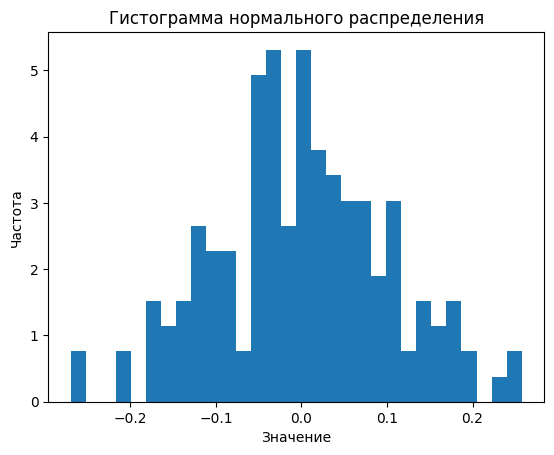

In [14]:

mu: float = 0  # среднее
sigma: float = 0.1  # стандартное отклонение
normal_distribution: np.ndarray = np.random.normal(mu, sigma, 150)
print(normal_distribution)
plt.hist(normal_distribution, bins=30, density=True)
plt.title('Гистограмма нормального распределения')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

## Метод Граббса

In [15]:
def grubbs_test(values, alpha=0.05):
    x = values.copy()
    outliers = []

    while True:

        mean = np.mean(x)
        std = np.std(x, ddof=1)

        # Проверяем оба конца распределения
        max_val, min_val = np.max(x), np.min(x)
        g_max = (max_val - mean)/std
        g_min = (mean - min_val)/std

        # Выбираем более экстремальное значение
        if g_max > g_min:
            candidate, g = max_val, g_max
            candidate_idx = np.argmax(x)
        else:
            candidate, g = min_val, g_min
            candidate_idx = np.argmin(x)

        # Критическое значение
        n = len(x)
        t = stats.t.ppf(alpha, n-2)
        g_critical = (np.sqrt(n-1) * t) / np.sqrt((n-2) + t**2)

        if g > g_critical:
            outliers.append(candidate)
            x = np.delete(x, candidate_idx)
        else:
            break

    return outliers

for col in columns:
    outliers = grubbs_test(stats_data[col]['values'])
    if outliers:
        print(f"Выбросы в столбце {plot_config[col]['title']} ({col}):")
        for value in outliers:
            print(f"  Значение: {value}")
    else:
        print(f"В столбце {plot_config[col]['title']} ({col}) выбросов не обнаружено")
    print()

<ipython-input-15-80932f52eb3b>:12: RuntimeWarning: invalid value encountered in scalar divide
  g_max = (max_val - mean)/std
<ipython-input-15-80932f52eb3b>:13: RuntimeWarning: invalid value encountered in scalar divide
  g_min = (mean - min_val)/std


Выбросы в столбце Число работников (X1):
  Значение: 0
  Значение: 0
  Значение: 0
  Значение: 20
  Значение: 20
  Значение: 20
  Значение: 1
  Значение: 1
  Значение: 1
  Значение: 1
  Значение: 1
  Значение: 2
  Значение: 2
  Значение: 2
  Значение: 2
  Значение: 2
  Значение: 2
  Значение: 19
  Значение: 19
  Значение: 19
  Значение: 19
  Значение: 19
  Значение: 19
  Значение: 19
  Значение: 19
  Значение: 18
  Значение: 18
  Значение: 18
  Значение: 18
  Значение: 18
  Значение: 3
  Значение: 3
  Значение: 3
  Значение: 3
  Значение: 3
  Значение: 3
  Значение: 3
  Значение: 3
  Значение: 3
  Значение: 4
  Значение: 4
  Значение: 4
  Значение: 4
  Значение: 17
  Значение: 17
  Значение: 17
  Значение: 17
  Значение: 17
  Значение: 17
  Значение: 17
  Значение: 17
  Значение: 16
  Значение: 16
  Значение: 16
  Значение: 16
  Значение: 16
  Значение: 16
  Значение: 16
  Значение: 16
  Значение: 15
  Значение: 15
  Значение: 15
  Значение: 15
  Значение: 15
  Значение: 15
  Значение:

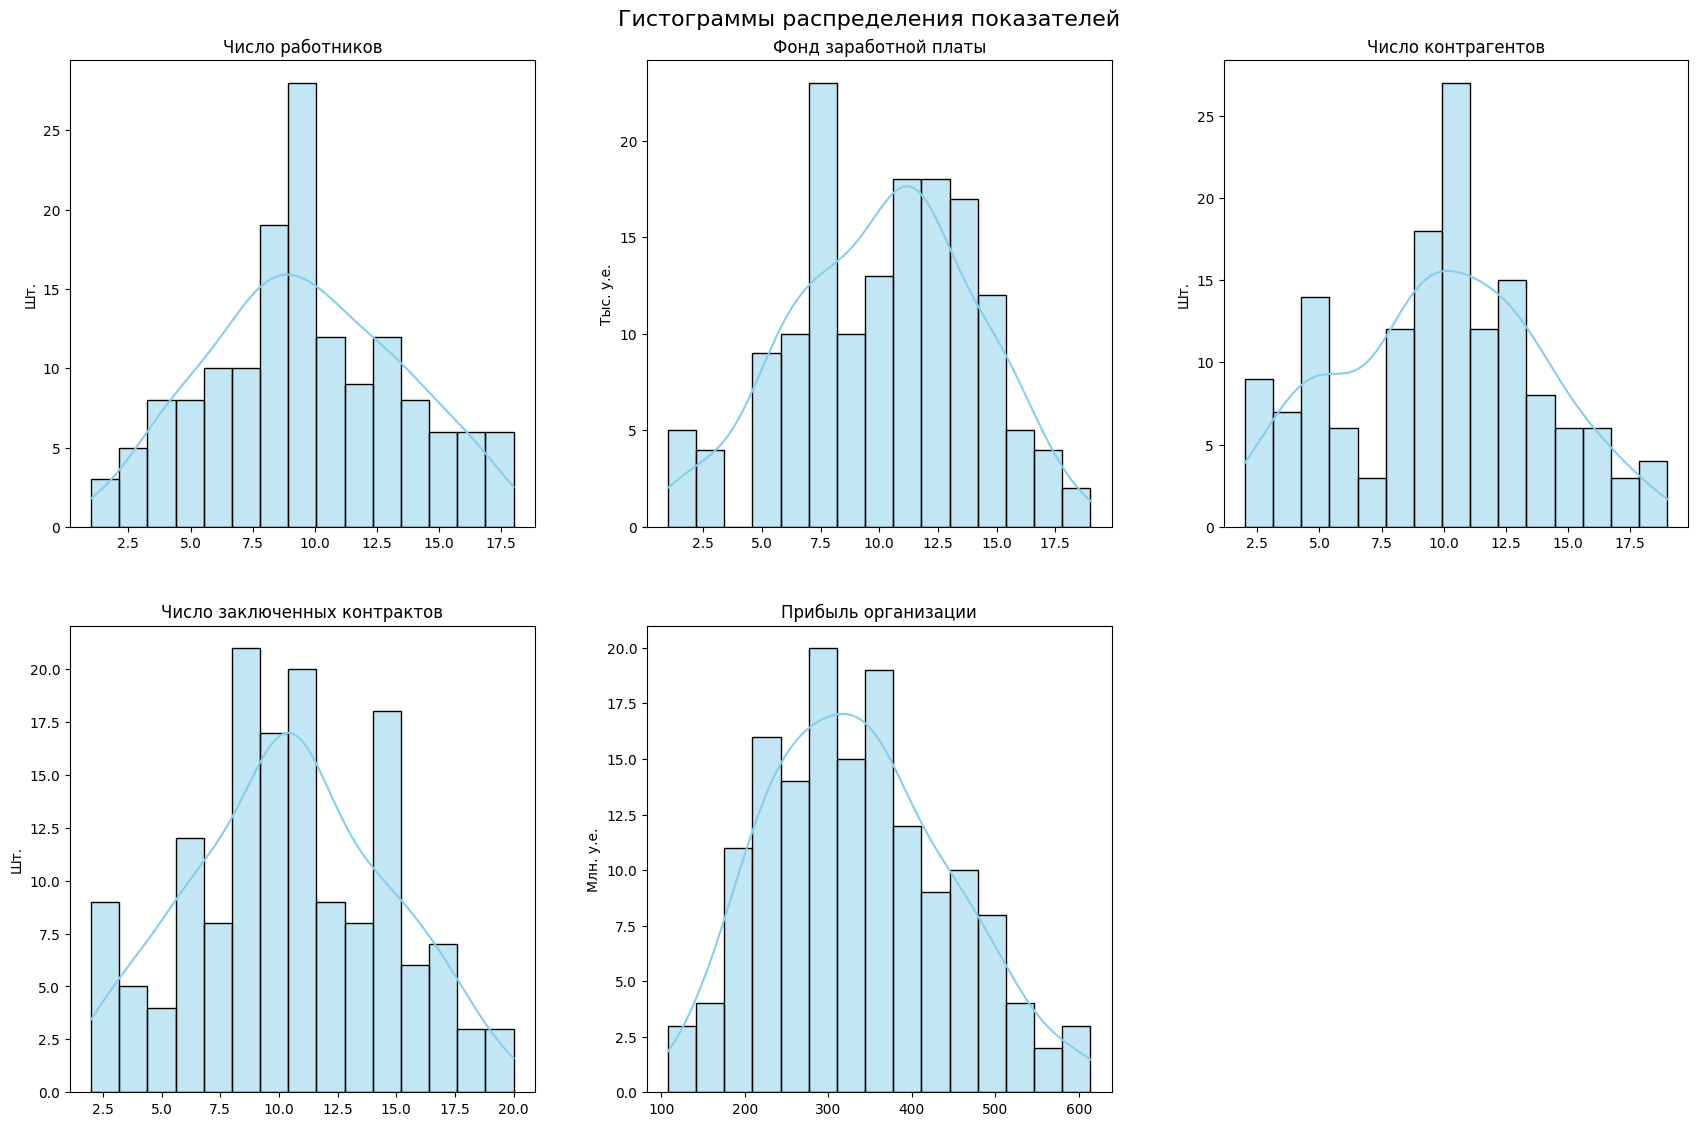

In [16]:
# Создаем фигуру с несколькими подграфиками
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.tight_layout(pad=5.0)

# Удаляем лишний подграфик (если столбцов 5, а подграфиков 6)
fig.delaxes(axes[1, 2])

# Строим гистограммы для каждого столбца
for i, col in enumerate(columns):
    ax = axes[i//3, i%3]  # Определяем позицию подграфика

    # Гистограмма с KDE (ядерной оценкой плотности)
    sns.histplot(data[col], kde=True, ax=ax, bins=15, color='skyblue')

    # Настраиваем заголовки и подписи из конфига
    ax.set_title(plot_config[col]['title'], fontsize=12)
    ax.set_ylabel(plot_config[col]['ylabel'], fontsize=10)
    ax.set_xlabel('')


plt.suptitle('Гистограммы распределения показателей', fontsize=16)
plt.show()


=== Анализ переменной X1 (Число работников) ===


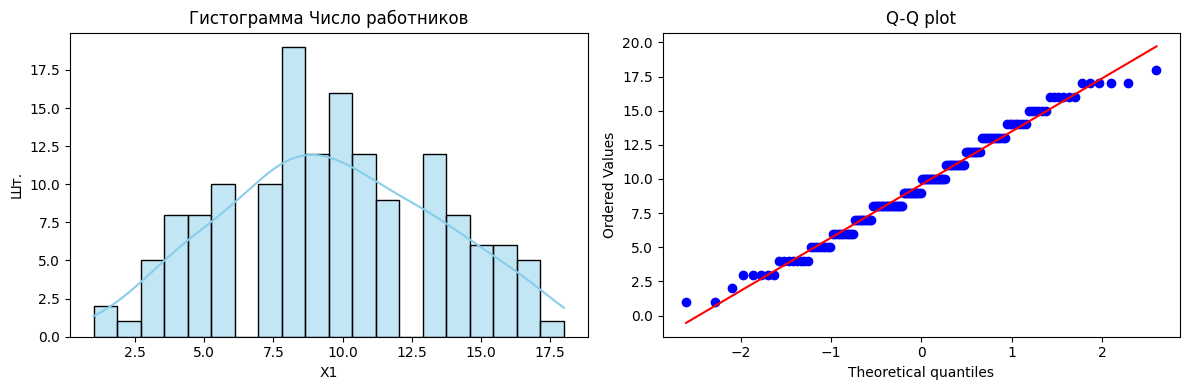

Тест KS на нормальность: p-value = 0.2891
GMM обнаружил 2 кластера(ов)

=== Анализ переменной X2 (Фонд заработной платы) ===


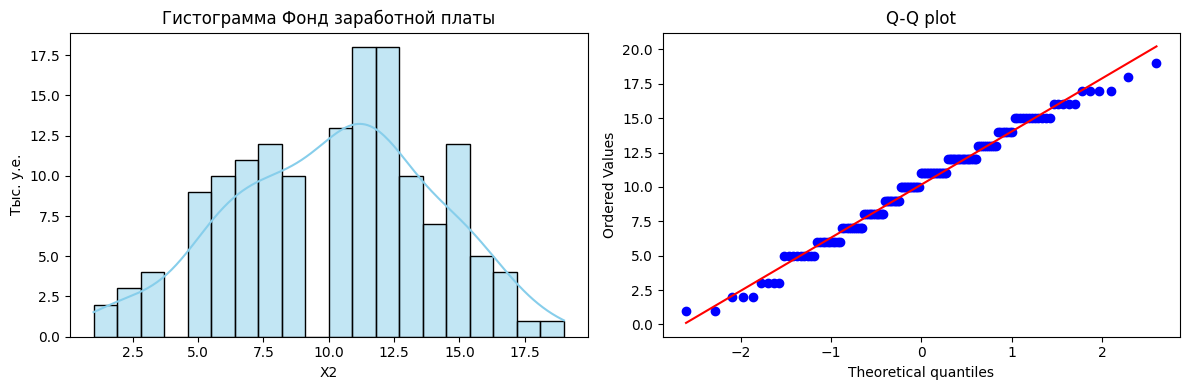

Тест KS на нормальность: p-value = 0.1442
GMM обнаружил 2 кластера(ов)

=== Анализ переменной X3 (Число контрагентов) ===


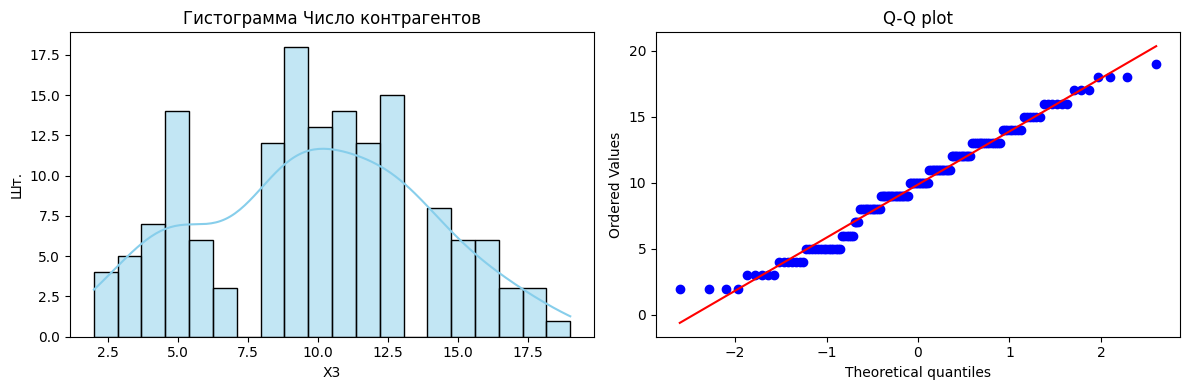

Тест KS на нормальность: p-value = 0.1880
GMM обнаружил 2 кластера(ов)

=== Анализ переменной X4 (Число заключенных контрактов) ===


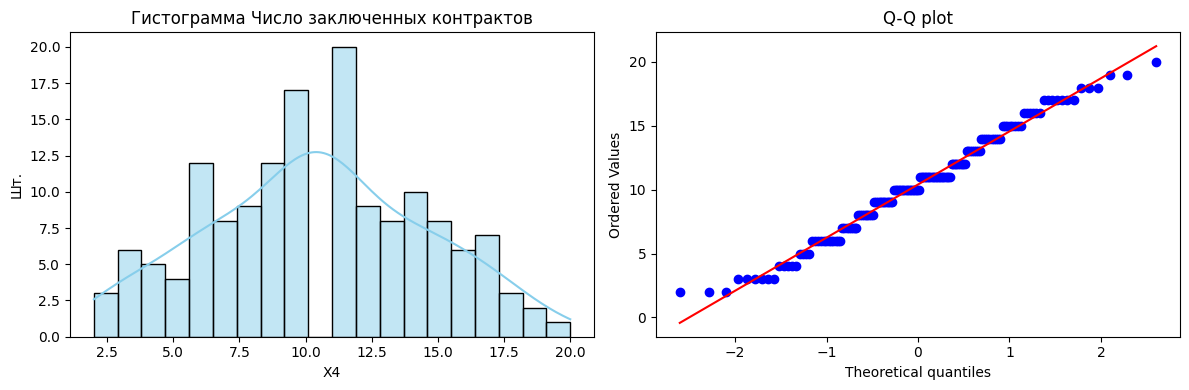

Тест KS на нормальность: p-value = 0.2388
GMM обнаружил 2 кластера(ов)

=== Анализ переменной Y (Прибыль организации) ===


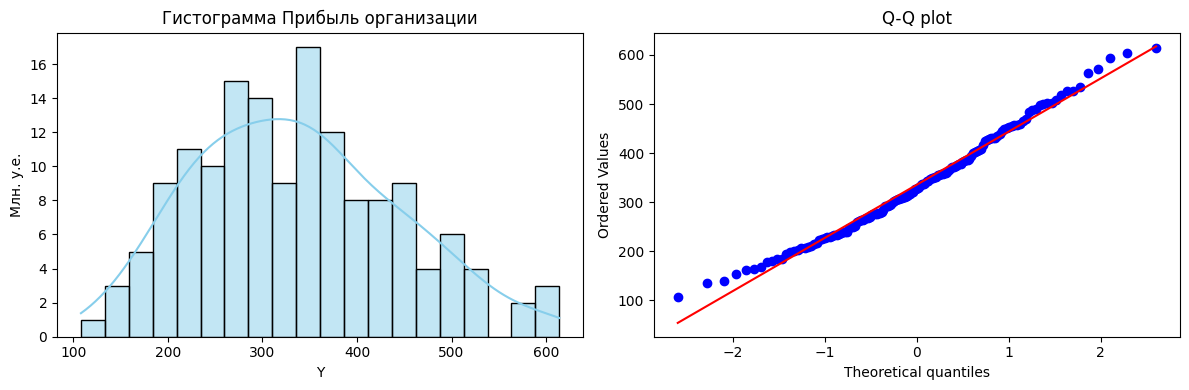

Тест KS на нормальность: p-value = 0.8037
GMM обнаружил 2 кластера(ов)

=== Сводные результаты проверки на однородность ===


,Однородность
X1,None
X2,None
X3,None
X4,None
Y,None


In [17]:
def check_homogeneity(series, col_name, config):
    """Проверяет выборку на однородность и визуализирует результаты"""
    print(f"\n=== Анализ переменной {col_name} ({config[col_name]['title']}) ===")

    # 1. Визуальный анализ
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(series, kde=True, bins=20, color='skyblue')
    plt.title(f"Гистограмма {config[col_name]['title']}")
    plt.ylabel(config[col_name]['ylabel'])

    plt.subplot(1, 2, 2)
    stats.probplot(series, dist="norm", plot=plt)
    plt.title("Q-Q plot")

    plt.tight_layout()
    plt.show()



    # Тест Колмогорова-Смирнова на нормальность
    ks_stat, ks_p = stats.kstest(series, 'norm', args=(series.mean(), series.std()))
    print(f"Тест KS на нормальность: p-value = {ks_p:.4f}")


    # 4. Кластеризация GMM
    gmm = GaussianMixture(n_components=2, random_state=42)
    clusters = gmm.fit_predict(series.values.reshape(-1, 1))
    unique_clusters = np.unique(clusters)
    print(f"GMM обнаружил {len(unique_clusters)} кластера(ов)")

    return

# Проверяем все переменные
results = {}
for col in ['X1', 'X2', 'X3', 'X4', 'Y']:
    results[col] = check_homogeneity(data[col], col, plot_config)

# Сводная таблица результатов
print("\n=== Сводные результаты проверки на однородность ===")
pd.DataFrame.from_dict(results, orient='index', columns=['Однородность'])


=== Анализ переменной X1 (Число работников) ===


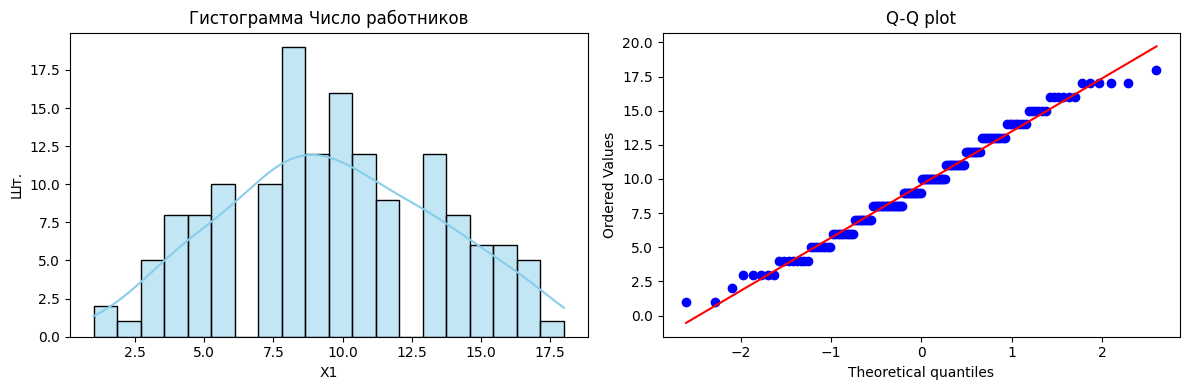

Критерий знаков: p-value = 1.0000
Критерий Вилкоксона: p-value = 0.9364

Заключение: выборка однородна

=== Анализ переменной X2 (Фонд заработной платы) ===


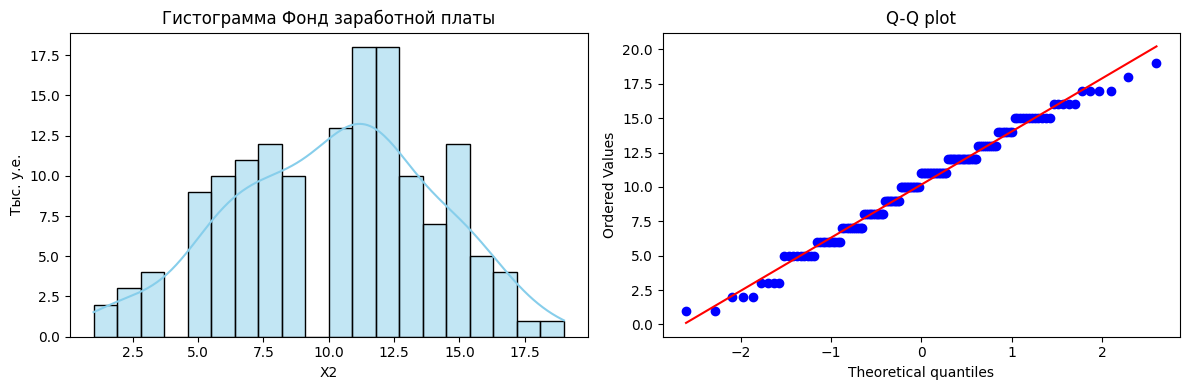

Критерий знаков: p-value = 0.6353
Критерий Вилкоксона: p-value = 0.2676

Заключение: выборка однородна

=== Анализ переменной X3 (Число контрагентов) ===


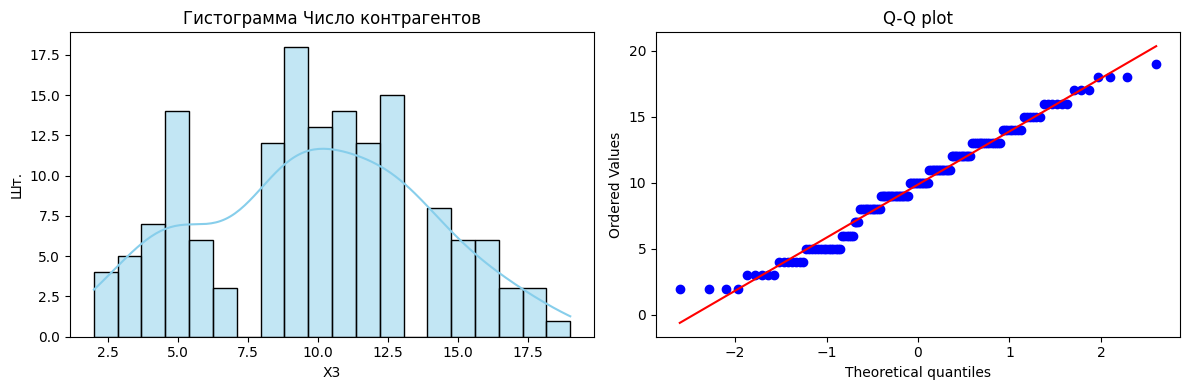

Критерий знаков: p-value = 0.0018
Критерий Вилкоксона: p-value = 0.0522

Заключение: выборка неоднородна

=== Анализ переменной X4 (Число заключенных контрактов) ===


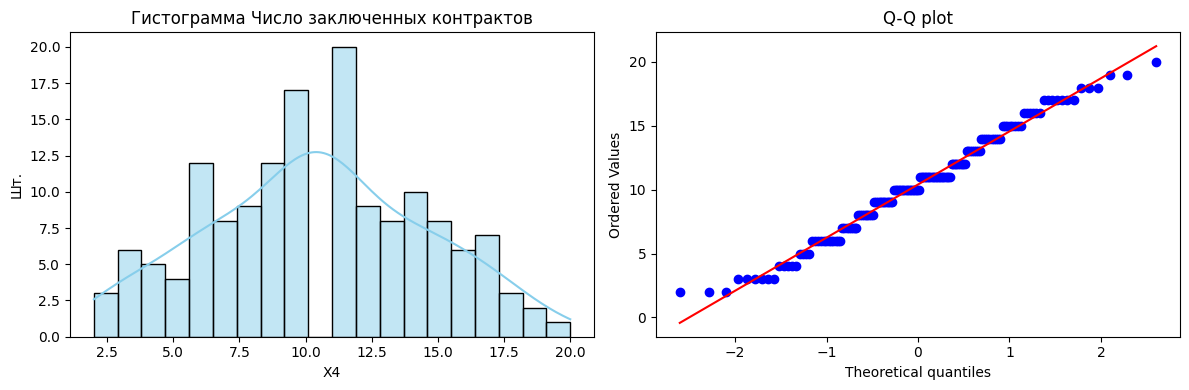

Критерий знаков: p-value = 0.4828
Критерий Вилкоксона: p-value = 0.3047

Заключение: выборка однородна

=== Анализ переменной Y (Прибыль организации) ===


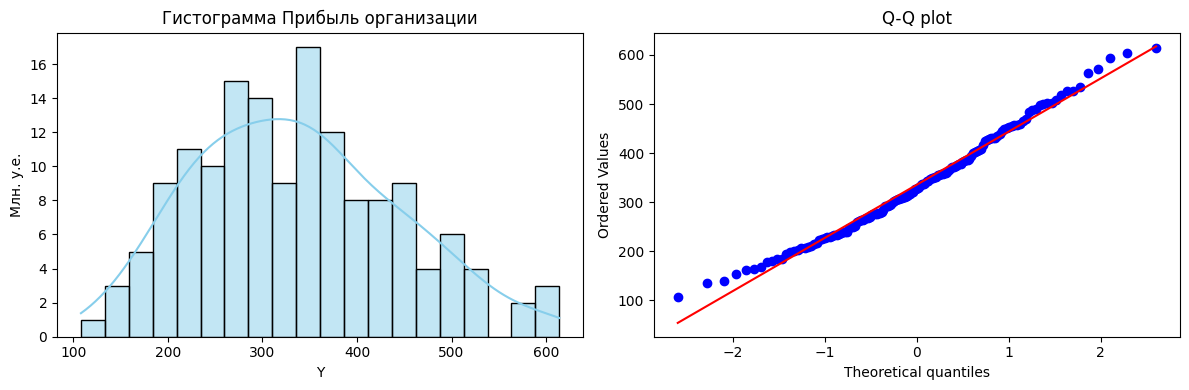

Критерий знаков: p-value = 0.0370
Критерий Вилкоксона: p-value = 0.0510

Заключение: выборка неоднородна

=== Сводные результаты проверки на однородность ===


,Однородность
X1,True
X2,True
X3,False
X4,True
Y,False


In [18]:
def check_homogeneity(series, col_name, config):
    """Проверяет выборку на однородность с помощью критериев знаков и Вилкоксона"""
    print(f"\n=== Анализ переменной {col_name} ({config[col_name]['title']}) ===")

    # 1. Визуальный анализ
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(series, kde=True, bins=20, color='skyblue')
    plt.title(f"Гистограмма {config[col_name]['title']}")
    plt.ylabel(config[col_name]['ylabel'])

    plt.subplot(1, 2, 2)
    stats.probplot(series, dist="norm", plot=plt)
    plt.title("Q-Q plot")

    plt.tight_layout()
    plt.show()

    # 2. Разделяем выборку на две части для проверки однородности
    n = len(series)
    part1 = series[:n//2]
    part2 = series[n//2:]

    # 3. Критерий знаков (Sign Test)
    diff = part1.values - part2.values[:len(part1)]  # Берем одинаковое количество элементов
    n_pos = sum(diff > 0)
    n_neg = sum(diff < 0)
    sign_p = stats.binomtest(min(n_pos, n_neg), n_pos + n_neg, 0.5).pvalue
    print(f"Критерий знаков: p-value = {sign_p:.4f}")

    # 4. Критерий Вилкоксона (Wilcoxon Signed-Rank Test)
    try:
        wilcoxon_stat, wilcoxon_p = stats.wilcoxon(part1, part2[:len(part1)])
        print(f"Критерий Вилкоксона: p-value = {wilcoxon_p:.4f}")
    except:
        wilcoxon_p = 1.0
        print("Критерий Вилкоксона не может быть применен (все различия нулевые)")

    # 5. Вывод о однородности
    is_homogeneous = sign_p > 0.05 and wilcoxon_p > 0.05
    print(f"\nЗаключение: выборка {'однородна' if is_homogeneous else 'неоднородна'}")

    return is_homogeneous

# Проверяем все переменные
results = {}
for col in ['X1', 'X2', 'X3', 'X4', 'Y']:
    results[col] = check_homogeneity(data[col], col, plot_config)

# Сводная таблица результатов
print("\n=== Сводные результаты проверки на однородность ===")
result_df = pd.DataFrame.from_dict(results, orient='index', columns=['Однородность'])
result_df